In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid") # darkgrid, whitegrid, dark, white, and ticks
sns.despine() 
sns.set_context() # paper, notebook, talk, and poster 
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from skimpy import clean_columns
from imblearn.over_sampling import SMOTE 
import statsmodels.formula.api as SM

C:\Users\shail\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 432x288 with 0 Axes>

In [2]:
# import and read the head and tail of the data


df = pd.read_excel('Company_Data2015-1 (2).xlsx')
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
df.tail()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.0,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.0,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.0,0.36,0.68
3585,15542,Bharti Airtel,111729.10,1998.70,78270.80,104241.00,21569.70,100084.90,-12145.30,11947.10,...,42.47,22.88,34.04,25.97,6.37,18,74,0.0,0.42,0.49


In [4]:
# remove special characters from the column names

df.columns = df.columns.str.replace('%','perc').str.replace('/','_by_')

In [5]:
# skimpy will clean the columns

df=clean_columns(df,case='const')

61 column names have been cleaned

In [6]:
# check the renamed column names

df.columns.to_list()

['CO_CODE',
 'CO_NAME',
 'NETWORTH_NEXT_YEAR',
 'EQUITY_PAID_UP',
 'NETWORTH',
 'CAPITAL_EMPLOYED',
 'TOTAL_DEBT',
 'GROSS_BLOCK',
 'NET_WORKING_CAPITAL',
 'CURRENT_ASSETS',
 'CURRENT_LIABILITIES_AND_PROVISIONS',
 'TOTAL_ASSETS_BY_LIABILITIES',
 'GROSS_SALES',
 'NET_SALES',
 'OTHER_INCOME',
 'VALUE_OF_OUTPUT',
 'COST_OF_PRODUCTION',
 'SELLING_COST',
 'PBIDT',
 'PBDT',
 'PBIT',
 'PBT',
 'PAT',
 'ADJUSTED_PAT',
 'CP',
 'REVENUE_EARNINGS_IN_FOREX',
 'REVENUE_EXPENSES_IN_FOREX',
 'CAPITAL_EXPENSES_IN_FOREX',
 'BOOK_VALUE_UNIT_CURR',
 'BOOK_VALUE_ADJ_UNIT_CURR',
 'MARKET_CAPITALISATION',
 'CEPS_ANNUALISED_UNIT_CURR',
 'CASH_FLOW_FROM_OPERATING_ACTIVITIES',
 'CASH_FLOW_FROM_INVESTING_ACTIVITIES',
 'CASH_FLOW_FROM_FINANCING_ACTIVITIES',
 'ROG_NET_WORTH_PERC',
 'ROG_CAPITAL_EMPLOYED_PERC',
 'ROG_GROSS_BLOCK_PERC',
 'ROG_GROSS_SALES_PERC',
 'ROG_NET_SALES_PERC',
 'ROG_COST_OF_PRODUCTION_PERC',
 'ROG_TOTAL_ASSETS_PERC',
 'ROG_PBIDT_PERC',
 'ROG_PBDT_PERC',
 'ROG_PBIT_PERC',
 'ROG_PBT_PERC',
 'RO

In [7]:
# information on datatypes , presence of null values in the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CO_CODE                              3586 non-null   int64  
 1   CO_NAME                              3586 non-null   object 
 2   NETWORTH_NEXT_YEAR                   3586 non-null   float64
 3   EQUITY_PAID_UP                       3586 non-null   float64
 4   NETWORTH                             3586 non-null   float64
 5   CAPITAL_EMPLOYED                     3586 non-null   float64
 6   TOTAL_DEBT                           3586 non-null   float64
 7   GROSS_BLOCK                          3586 non-null   float64
 8   NET_WORKING_CAPITAL                  3586 non-null   float64
 9   CURRENT_ASSETS                       3586 non-null   float64
 10  CURRENT_LIABILITIES_AND_PROVISIONS   3586 non-null   float64
 11  TOTAL_ASSETS_BY_LIABILITIES   

In [8]:
# drop the categorical features

df.drop(['CO_CODE','CO_NAME'],axis =1 , inplace = True )

In [9]:
# check dtypes again

pd.options.display.max_rows = 68
df.dtypes

NETWORTH_NEXT_YEAR                     float64
EQUITY_PAID_UP                         float64
NETWORTH                               float64
CAPITAL_EMPLOYED                       float64
TOTAL_DEBT                             float64
GROSS_BLOCK                            float64
NET_WORKING_CAPITAL                    float64
CURRENT_ASSETS                         float64
CURRENT_LIABILITIES_AND_PROVISIONS     float64
TOTAL_ASSETS_BY_LIABILITIES            float64
GROSS_SALES                            float64
NET_SALES                              float64
OTHER_INCOME                           float64
VALUE_OF_OUTPUT                        float64
COST_OF_PRODUCTION                     float64
SELLING_COST                           float64
PBIDT                                  float64
PBDT                                   float64
PBIT                                   float64
PBT                                    float64
PAT                                    float64
ADJUSTED_PAT 

In [10]:
# find out the features which have missing values more than 1

df_miss_col=df.isnull().sum().sort_values(ascending=False)
df_miss_col[df_miss_col > 0]

INVENTORY_VELOCITY_DAYS              103
BOOK_VALUE_ADJ_UNIT_CURR               4
CURRENT_RATIO_LATEST                   1
PBITM_PERC_LATEST                      1
FIXED_ASSETS_RATIO_LATEST              1
INVENTORY_RATIO_LATEST                 1
DEBTORS_RATIO_LATEST                   1
TOTAL_ASSET_TURNOVER_RATIO_LATEST      1
PBIDTM_PERC_LATEST                     1
INTEREST_COVER_RATIO_LATEST            1
PBDTM_PERC_LATEST                      1
CPM_PERC_LATEST                        1
APATM_PERC_LATEST                      1
dtype: int64

In [11]:
# convert target variable - Networth_Next_Year to a binary variable 0 and 1
df['default'] = np.where(df.NETWORTH_NEXT_YEAR > 0,0,1)
df[['default','NETWORTH_NEXT_YEAR']].head()                  # check default and Networth_Next_Year

,default,NETWORTH_NEXT_YEAR
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36


In [12]:
# statistical summary of the features

(df.describe().T).round(2)

,count,mean,std,min,25%,50%,75%,max
NETWORTH_NEXT_YEAR,3586.0,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
EQUITY_PAID_UP,3586.0,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
NETWORTH,3586.0,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
CAPITAL_EMPLOYED,3586.0,2799.61,26975.14,-1824.75,7.60,39.09,226.60,714001.25
TOTAL_DEBT,3586.0,1994.82,23652.84,-0.72,0.03,7.49,72.35,652823.81
GROSS_BLOCK,3586.0,594.18,4871.55,-41.19,0.57,15.87,131.90,128477.59
NET_WORKING_CAPITAL,3586.0,410.81,6301.22,-13162.42,0.94,10.14,61.18,223257.56
CURRENT_ASSETS,3586.0,1960.35,22577.57,-0.91,4.00,24.54,135.28,721166.00
CURRENT_LIABILITIES_AND_PROVISIONS,3586.0,391.99,2675.00,-0.23,0.73,9.23,65.65,83232.98
TOTAL_ASSETS_BY_LIABILITIES,3586.0,1778.45,11437.57,-4.51,10.56,52.01,310.54,254737.22


In [13]:
# seperate the dependent feature

y=df[['default']]

In [14]:
# seperate the independent features after dropping Networth_next_year 

XX=df.drop(['NETWORTH_NEXT_YEAR'],
        axis=1)                      # for the correlation study we have not separeted 'default' from XX

In [15]:
len(XX.columns)

65

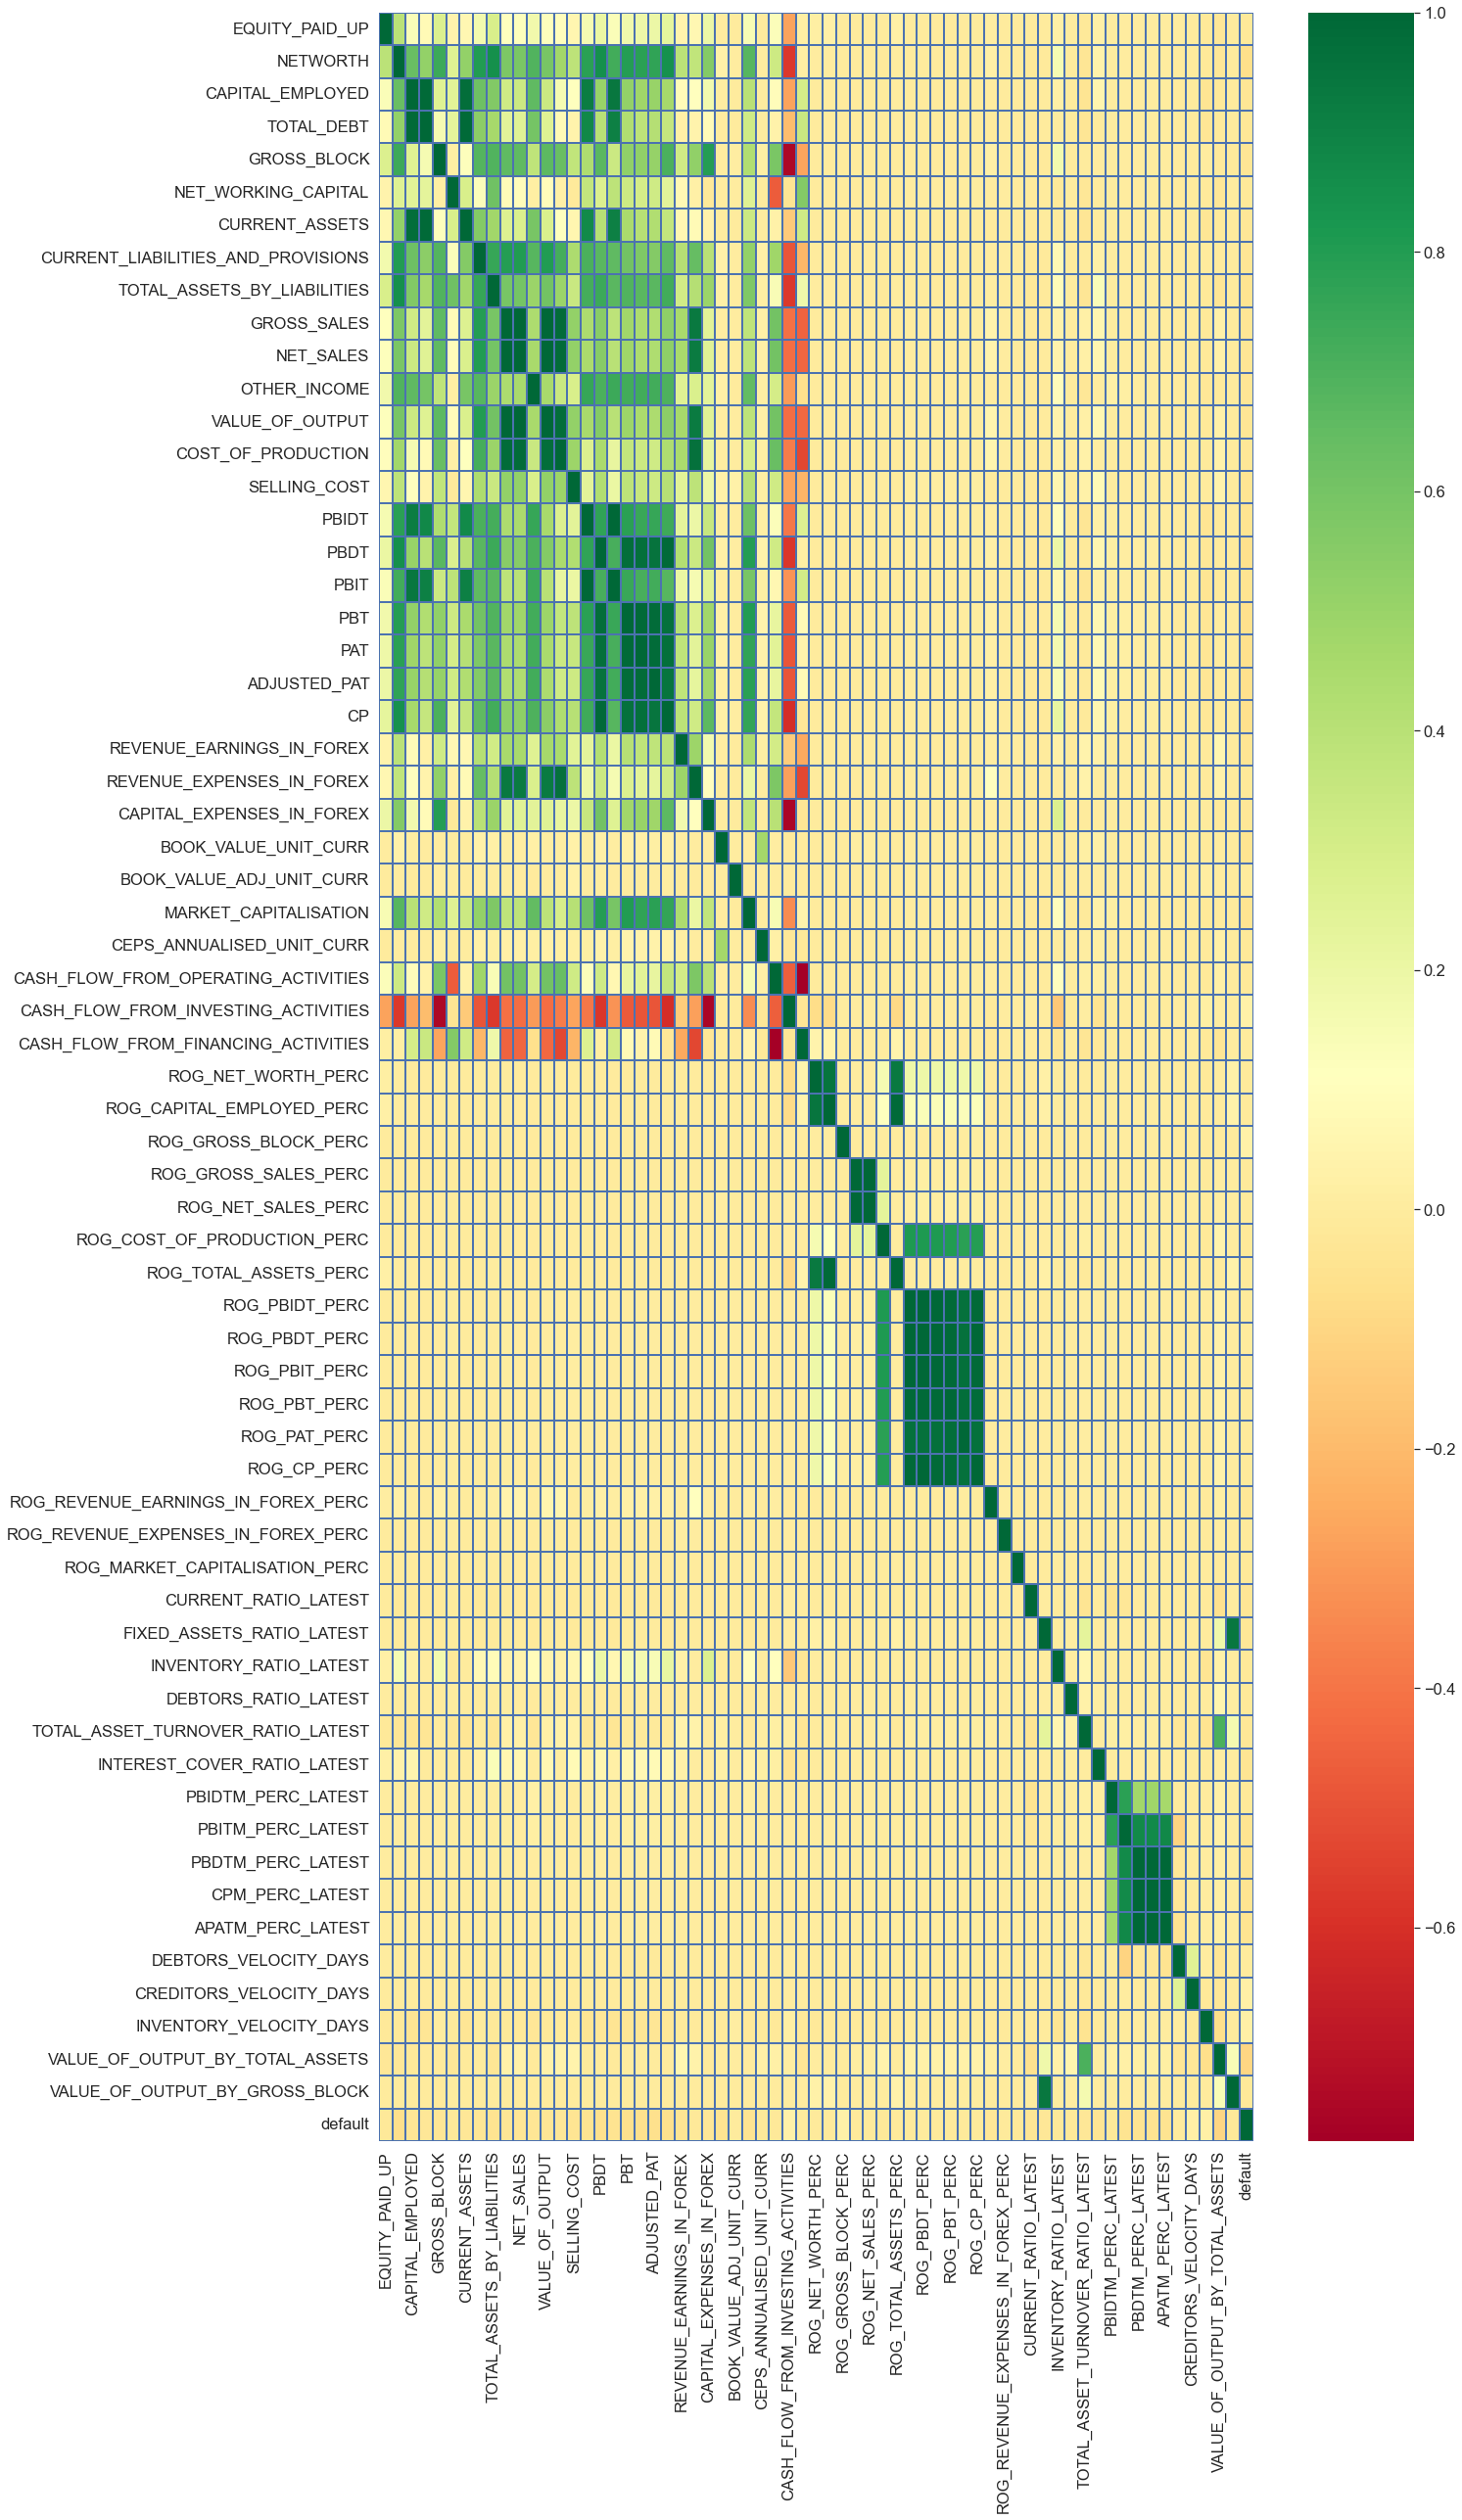

In [16]:
# observe the correlation between the features .
# We note that thate there are features that very highly corelated, and will lead to multicolinearaity problems later


corr=XX.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,40))
sns.set(font_scale=1.5)
mask=np.triu(corr,+1)
#plot heat map
g=sns.heatmap(XX[top_corr_features].corr(),
              annot=False,
              cmap="RdYlGn",
             linewidths=.01,
             linecolor='b')

In [17]:
# list of independent features

XX.columns.to_list()

['EQUITY_PAID_UP',
 'NETWORTH',
 'CAPITAL_EMPLOYED',
 'TOTAL_DEBT',
 'GROSS_BLOCK',
 'NET_WORKING_CAPITAL',
 'CURRENT_ASSETS',
 'CURRENT_LIABILITIES_AND_PROVISIONS',
 'TOTAL_ASSETS_BY_LIABILITIES',
 'GROSS_SALES',
 'NET_SALES',
 'OTHER_INCOME',
 'VALUE_OF_OUTPUT',
 'COST_OF_PRODUCTION',
 'SELLING_COST',
 'PBIDT',
 'PBDT',
 'PBIT',
 'PBT',
 'PAT',
 'ADJUSTED_PAT',
 'CP',
 'REVENUE_EARNINGS_IN_FOREX',
 'REVENUE_EXPENSES_IN_FOREX',
 'CAPITAL_EXPENSES_IN_FOREX',
 'BOOK_VALUE_UNIT_CURR',
 'BOOK_VALUE_ADJ_UNIT_CURR',
 'MARKET_CAPITALISATION',
 'CEPS_ANNUALISED_UNIT_CURR',
 'CASH_FLOW_FROM_OPERATING_ACTIVITIES',
 'CASH_FLOW_FROM_INVESTING_ACTIVITIES',
 'CASH_FLOW_FROM_FINANCING_ACTIVITIES',
 'ROG_NET_WORTH_PERC',
 'ROG_CAPITAL_EMPLOYED_PERC',
 'ROG_GROSS_BLOCK_PERC',
 'ROG_GROSS_SALES_PERC',
 'ROG_NET_SALES_PERC',
 'ROG_COST_OF_PRODUCTION_PERC',
 'ROG_TOTAL_ASSETS_PERC',
 'ROG_PBIDT_PERC',
 'ROG_PBDT_PERC',
 'ROG_PBIT_PERC',
 'ROG_PBT_PERC',
 'ROG_PAT_PERC',
 'ROG_CP_PERC',
 'ROG_REVENUE_EARN

In [18]:
top_corr_features

Index(['EQUITY_PAID_UP', 'NETWORTH', 'CAPITAL_EMPLOYED', 'TOTAL_DEBT',
       'GROSS_BLOCK', 'NET_WORKING_CAPITAL', 'CURRENT_ASSETS',
       'CURRENT_LIABILITIES_AND_PROVISIONS', 'TOTAL_ASSETS_BY_LIABILITIES',
       'GROSS_SALES', 'NET_SALES', 'OTHER_INCOME', 'VALUE_OF_OUTPUT',
       'COST_OF_PRODUCTION', 'SELLING_COST', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'ADJUSTED_PAT', 'CP', 'REVENUE_EARNINGS_IN_FOREX',
       'REVENUE_EXPENSES_IN_FOREX', 'CAPITAL_EXPENSES_IN_FOREX',
       'BOOK_VALUE_UNIT_CURR', 'BOOK_VALUE_ADJ_UNIT_CURR',
       'MARKET_CAPITALISATION', 'CEPS_ANNUALISED_UNIT_CURR',
       'CASH_FLOW_FROM_OPERATING_ACTIVITIES',
       'CASH_FLOW_FROM_INVESTING_ACTIVITIES',
       'CASH_FLOW_FROM_FINANCING_ACTIVITIES', 'ROG_NET_WORTH_PERC',
       'ROG_CAPITAL_EMPLOYED_PERC', 'ROG_GROSS_BLOCK_PERC',
       'ROG_GROSS_SALES_PERC', 'ROG_NET_SALES_PERC',
       'ROG_COST_OF_PRODUCTION_PERC', 'ROG_TOTAL_ASSETS_PERC',
       'ROG_PBIDT_PERC', 'ROG_PBDT_PERC', 'ROG_PBIT_PERC'

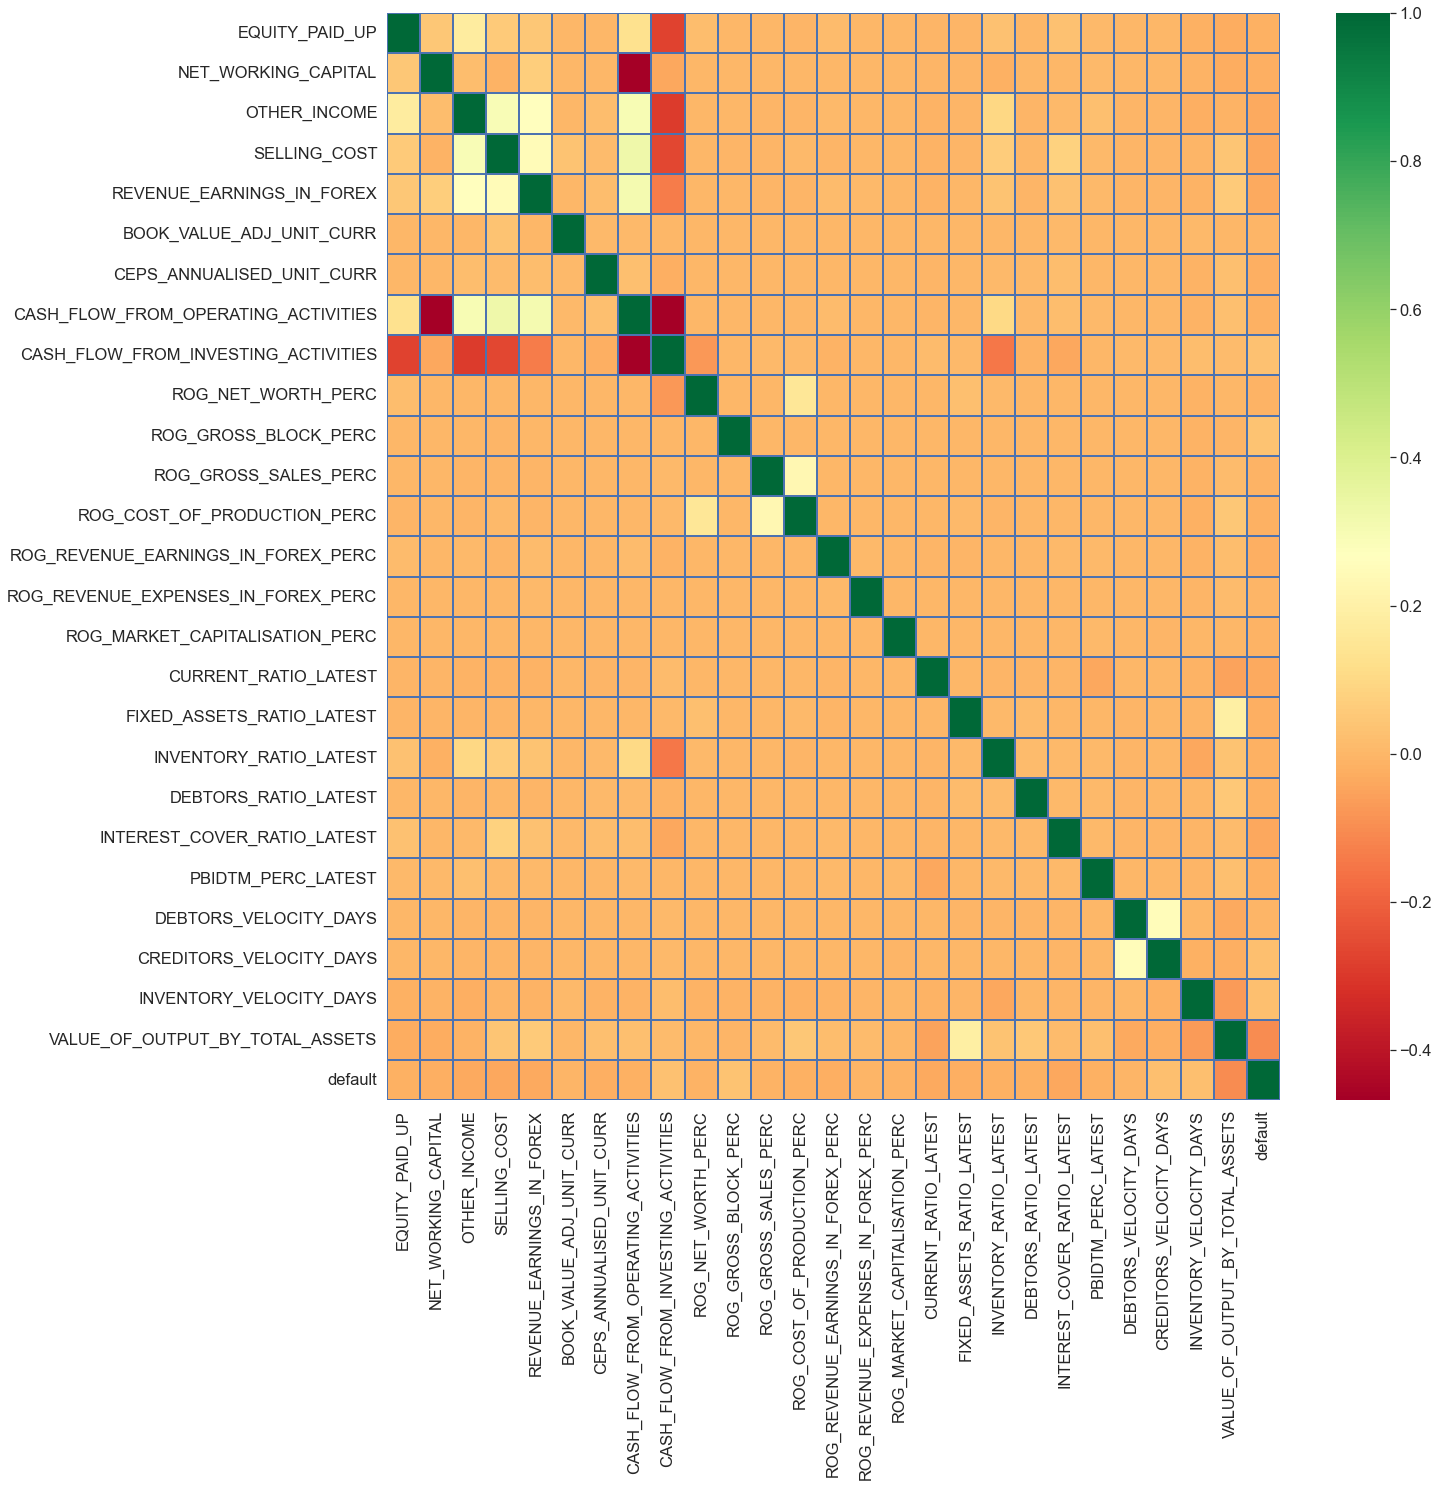

In [19]:
# drop the highly correlated features


XX.drop(['VALUE_OF_OUTPUT_BY_GROSS_BLOCK',
'TOTAL_ASSET_TURNOVER_RATIO_LATEST',
'ROG_TOTAL_ASSETS_PERC',
'ROG_PBDT_PERC',
 'ROG_PBIT_PERC',
 'ROG_PBT_PERC',
 'ROG_PAT_PERC',
 'ROG_CP_PERC',
'PBITM_PERC_LATEST',
 'PBDTM_PERC_LATEST',
 'CPM_PERC_LATEST',
 'APATM_PERC_LATEST',
'ROG_NET_SALES_PERC',
'ROG_CAPITAL_EMPLOYED_PERC',
'ADJUSTED_PAT',
'PAT', 'CP',
'PBDT',
'GROSS_SALES',
'TOTAL_DEBT',
'NET_SALES',
'REVENUE_EXPENSES_IN_FOREX',
'CURRENT_ASSETS',
'PBIT',
 'PBT',
'COST_OF_PRODUCTION',
'PBDT',
'PBIDT',
'CAPITAL_EXPENSES_IN_FOREX',
'TOTAL_ASSETS_BY_LIABILITIES',
'CURRENT_LIABILITIES_AND_PROVISIONS',
'NETWORTH',
 'CAPITAL_EMPLOYED',
  'GROSS_BLOCK',
'MARKET_CAPITALISATION',
'VALUE_OF_OUTPUT',
'CASH_FLOW_FROM_FINANCING_ACTIVITIES',
'BOOK_VALUE_UNIT_CURR',
'ROG_PBIDT_PERC'],axis=1,inplace=True)


# check for colinaearity again

corr=XX.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
mask=np.triu(corr,+1)
#plot heat map
g=sns.heatmap(XX[top_corr_features].corr(),
              annot=False,
              cmap="RdYlGn",
             linewidths=.01,
             linecolor='b')

In [20]:
# we have now 27 features to work with

len(XX.columns)

27

In [21]:
# rows whixh have missing records in more than 10 % of features

df_miss_row=XX.isnull().sum(axis=1).sort_values(ascending=False)  # all rows which have missing values
df_miss_row
#df_miss_row[df_miss_row > len(XX.columns)*0.1]   # those rows which have missing records in more than 10 % of features


2825    6
393     1
277     1
598     1
3001    1
       ..
1213    0
1215    0
1216    0
1217    0
3585    0
Length: 3586, dtype: int64

In [22]:
XX.drop([2825], axis=0, inplace=True)   # row with Index # 2825 dropped as it has 11 missing features
display(XX.shape)
y.drop([2825],axis=0,inplace=True)
display(y.shape)

(3585, 27)

(3585, 1)

In [23]:
# seperate the dependent variable 

X=XX.drop(['default'],
        axis=1)
        

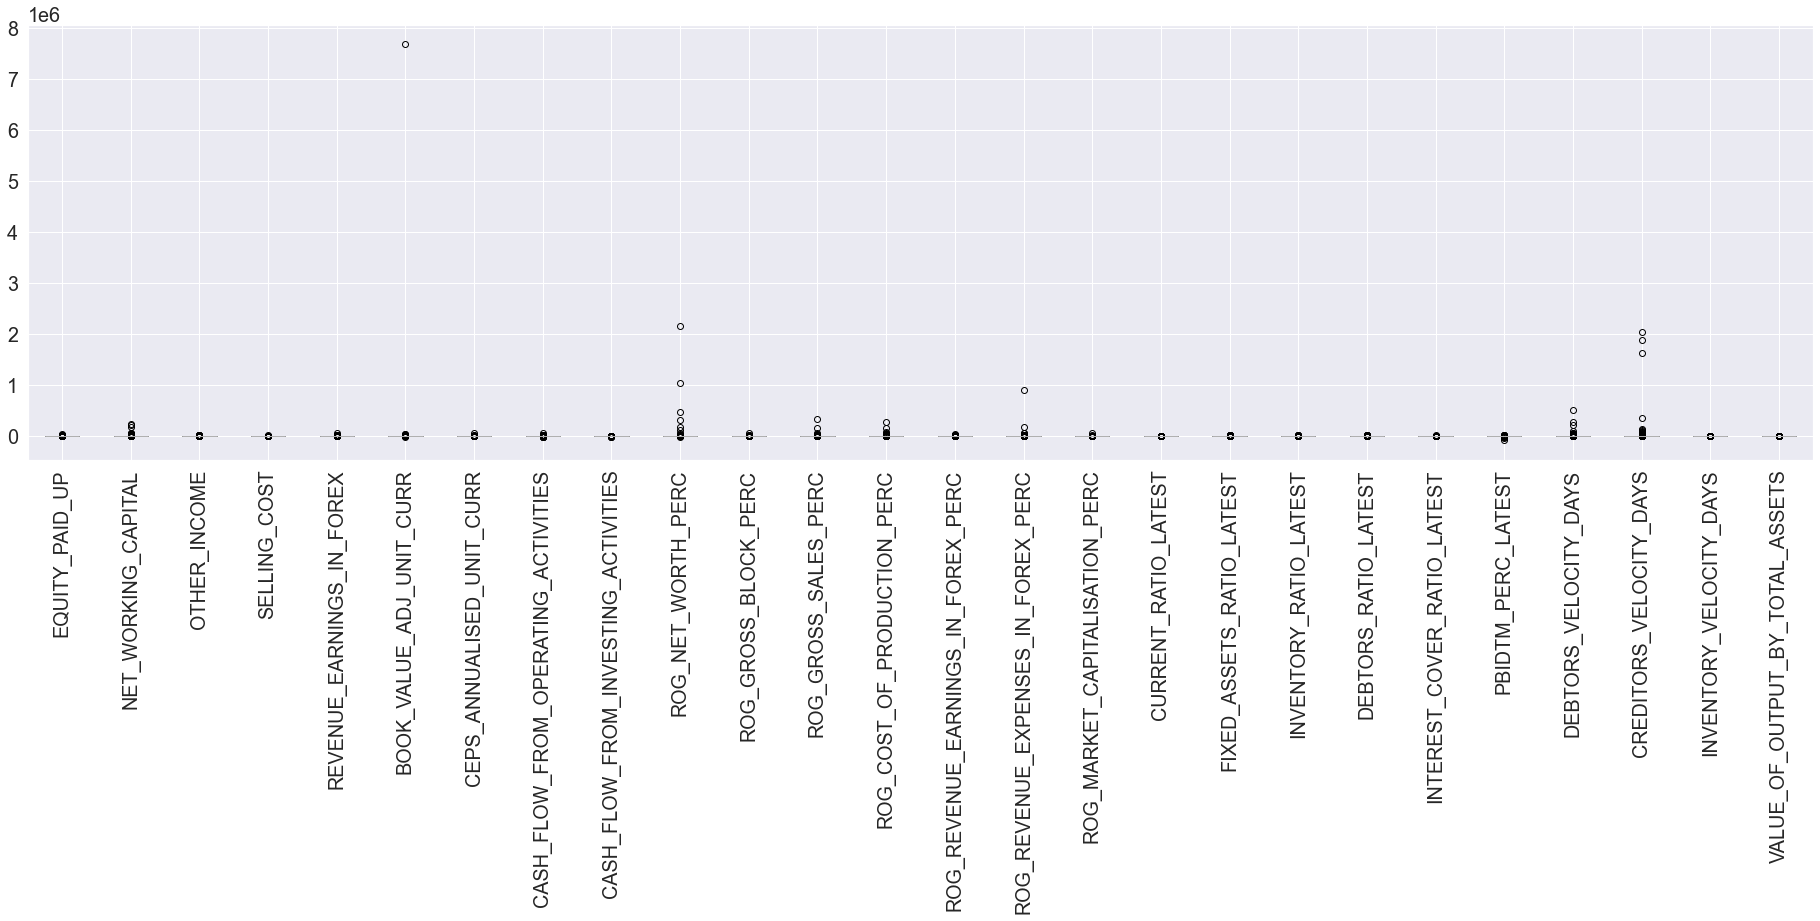

In [24]:
# Outlier Treatment

# First view the outliers
plt.figure(figsize=(32,8))
sns.set(font_scale =1.8)
X.boxplot();
plt.xticks(rotation=90);

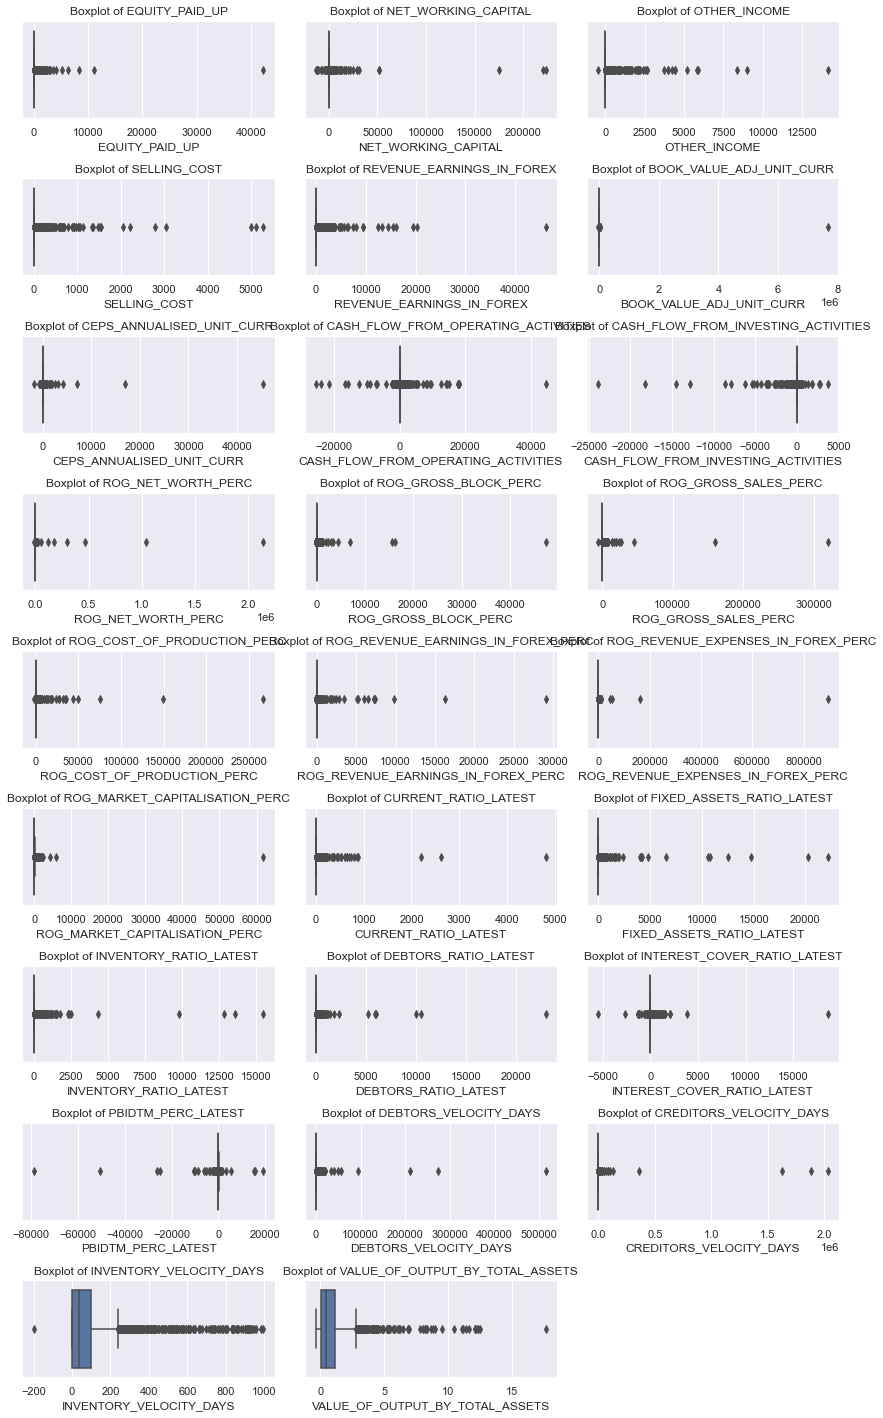

In [25]:
plt.figure(figsize = (12,50))

sns.set(font_scale=1)
for i in range(len(X.columns.to_list())):
    plt.subplot(23, 3, i + 1)
    sns.boxplot(x = X[X.columns.to_list()[i]])
    plt.title('Boxplot of {}'.format(X.columns.to_list()[i]))
    plt.tight_layout()

In [26]:
Q3 = X.quantile(0.75)
Q1 = X.quantile(0.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [27]:
((X > UL) | (X < LL)).sum().sum()    # ascertain the total number of outliers in the reduced dataframe of 26 independent variables

16469

In [28]:
X.size  # total cells available in X dataframe

93210

In [29]:
((X > UL) | (X < LL)).sum().sum()/X.size   # % of outliers in the X dataframe

0.17668705074562815

In [30]:
X[((X > UL) | (X < LL))] = np.nan   # convert all outliers to Nan

In [31]:
X.isnull().sum().sum() # check again the number of Nan values

16576

In [32]:
# after replacing all outliers with Nans - ascertain the features with missing records
# we shall drop those heatures which have more than 30% recods missing

X_miss_col = X.isnull().sum()
(X_miss_col[X.isnull().sum()>0].sort_values(ascending=False)*100/X.shape[0]).round(2)

ROG_REVENUE_EXPENSES_IN_FOREX_PERC     45.05
ROG_REVENUE_EARNINGS_IN_FOREX_PERC     36.74
CASH_FLOW_FROM_INVESTING_ACTIVITIES    24.46
ROG_GROSS_BLOCK_PERC                   23.15
CASH_FLOW_FROM_OPERATING_ACTIVITIES    22.37
ROG_NET_WORTH_PERC                     20.84
REVENUE_EARNINGS_IN_FOREX              20.59
INTEREST_COVER_RATIO_LATEST            20.22
ROG_COST_OF_PRODUCTION_PERC            18.83
ROG_GROSS_SALES_PERC                   18.72
NET_WORKING_CAPITAL                    17.43
SELLING_COST                           16.96
CEPS_ANNUALISED_UNIT_CURR              16.88
OTHER_INCOME                           16.79
PBIDTM_PERC_LATEST                     16.60
CURRENT_RATIO_LATEST                   15.76
ROG_MARKET_CAPITALISATION_PERC         13.86
FIXED_ASSETS_RATIO_LATEST              13.81
BOOK_VALUE_ADJ_UNIT_CURR               13.67
EQUITY_PAID_UP                         12.50
DEBTORS_VELOCITY_DAYS                  11.10
CREDITORS_VELOCITY_DAYS                10.91
INVENTORY_

In [33]:
# drop the features that have more than 30 % records missing

X.drop(['ROG_REVENUE_EXPENSES_IN_FOREX_PERC','ROG_REVENUE_EARNINGS_IN_FOREX_PERC'],axis=1,inplace = True)

In [34]:
X.shape

(3585, 24)

default
0          3197
1           388
dtype: int64

default
0          0.891771
1          0.108229
dtype: float64

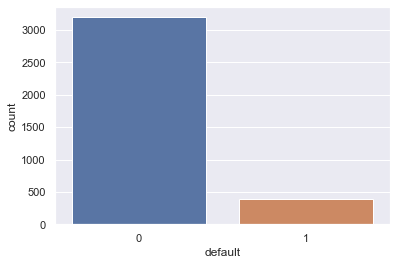

In [35]:
# find out the proportion of default in given data.

display(y.value_counts())
display(y.value_counts(normalize=True))
sns.countplot(data =y,
             x='default');

In [36]:
# split the data into train and test sets, 
# use the stratify parameter to ensure that the proportion of default in train and test data set is the same



seed = 123
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               random_state=seed,
                                               test_size=0.33,
                                               stratify=y.default)

display(X_train)
display(X_test)

,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,CURRENT_RATIO_LATEST,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS
1913,10.94,14.11,2.28,0.73,NaN,22.44,1.92,9.72,-3.45,4.07,...,1.24,0.20,1.60,2.31,-3.62,-24.77,59.0,45.0,110.0,0.17
2811,11.16,111.99,NaN,0.06,0.00,70.96,NaN,-2.31,5.19,NaN,...,NaN,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00
3172,14.61,NaN,8.78,NaN,NaN,NaN,NaN,NaN,NaN,-1.06,...,1.80,6.23,4.69,4.16,NaN,9.99,88.0,94.0,104.0,1.12
1494,6.64,71.22,0.08,0.24,0.00,1.74,2.08,-0.54,3.07,1.67,...,NaN,1.74,NaN,10.67,NaN,0.12,19.0,1.0,7.0,1.88
750,3.10,2.02,0.00,0.00,0.00,10.59,0.00,-0.01,-0.02,-0.30,...,NaN,3.40,0.00,0.00,0.50,5.88,0.0,0.0,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,0.24,0.00,0.00,0.00,0.00,NaN,-0.83,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00
2301,24.60,71.99,0.73,1.38,NaN,9.72,2.21,-14.87,0.18,12.91,...,1.59,1.85,2.91,4.42,1.75,9.79,34.0,12.0,169.0,0.78
2024,18.40,111.02,7.11,6.68,1.14,1.89,2.36,7.18,NaN,NaN,...,1.03,1.43,1.85,16.34,6.42,15.54,13.0,35.0,100.0,1.50
2719,6.84,50.22,2.22,NaN,NaN,34.28,NaN,28.08,NaN,16.65,...,1.22,1.78,9.61,11.90,NaN,19.31,36.0,29.0,53.0,1.62


,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,CURRENT_RATIO_LATEST,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS
350,6.41,-0.23,0.00,0.03,0.00,-1.22,-0.50,-0.12,0.00,NaN,...,0.64,0.46,3.86,7.69,NaN,-6.10,62.0,31.0,62.0,1.05
1196,6.85,0.70,0.00,0.00,0.00,0.10,0.01,-6.29,0.00,NaN,...,NaN,5.00,0.00,0.24,0.00,25.00,NaN,91.0,0.0,0.05
2141,24.77,17.33,0.12,0.09,0.00,1.39,0.10,1.75,NaN,NaN,...,NaN,0.16,5.89,2.95,NaN,NaN,46.0,105.0,NaN,0.11
2267,12.15,22.96,2.60,NaN,NaN,32.93,9.16,12.15,-9.14,17.06,...,1.15,2.27,3.31,4.88,NaN,12.97,43.0,124.0,154.0,1.20
1458,4.71,2.31,0.01,0.00,0.00,12.95,4.88,-0.48,-1.00,NaN,...,3.17,2.16,0.00,6.21,NaN,34.12,63.0,16.0,0.0,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,5.06,56.93,0.02,5.10,0.46,51.50,11.19,9.96,0.58,3.41,...,1.15,6.06,5.71,6.06,1.44,5.25,82.0,95.0,112.0,2.08
2028,5.87,24.01,0.74,5.66,17.58,44.05,9.98,12.23,-0.13,14.42,...,2.37,2.38,4.63,12.30,NaN,6.45,45.0,1.0,83.0,1.85
1995,14.16,58.66,1.81,NaN,NaN,23.92,4.82,3.91,NaN,2.80,...,1.03,2.72,8.85,5.96,1.19,7.99,61.0,17.0,35.0,1.20
831,0.34,2.10,0.01,0.75,0.00,97.51,9.12,0.14,-0.08,3.43,...,1.52,3.75,12.50,14.85,2.29,3.53,29.0,11.0,39.0,NaN


default
0          2141
1           260
dtype: int64

default
0          0.891712
1          0.108288
dtype: float64

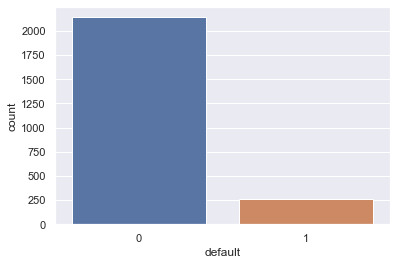

In [37]:
# visualize the proportion of default in train and test data and verify that they are more or less equal

display(y_train.value_counts())
display(y_train.value_counts(normalize=True))
sns.countplot(data =y_train,
             x='default');

default
0          1056
1           128
dtype: int64

default
0          0.891892
1          0.108108
dtype: float64

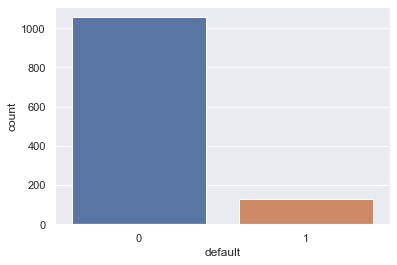

In [38]:
display(y_test.value_counts())
display(y_test.value_counts(normalize=True))
sns.countplot(data =y_test,
             x='default');

In [39]:
# scale (fit and transform) train data set . Only transform the test data


scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                       columns=X.columns,
                      index=X_train.index)
                       
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X.columns,
                     index=X_test.index)
                     
display(X_train)
display(X_test)

,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,CURRENT_RATIO_LATEST,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS
1913,0.124056,-0.183439,0.634139,-0.132107,NaN,-0.132127,-0.142319,0.945773,-0.861114,0.022281,...,-0.192394,-0.741648,-0.515571,-0.407887,-2.219596,-2.887043,0.103273,0.027194,1.091401,-0.723875
2811,0.147981,2.678147,NaN,-0.475610,-0.325055,1.291481,NaN,-0.610743,1.986415,NaN,...,NaN,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260
3172,0.523167,NaN,4.084114,NaN,NaN,NaN,NaN,NaN,NaN,-0.546536,...,0.328957,1.670689,0.107887,0.000863,NaN,0.031487,0.613834,1.061556,0.985968,0.731215
1494,-0.343567,1.486209,-0.533545,-0.383326,-0.325055,-0.739478,-0.114221,-0.381730,1.287716,-0.243832,...,NaN,-0.125562,NaN,1.439222,NaN,-0.797221,-0.600950,-0.901620,-0.718528,1.895287
750,-0.728541,-0.536898,-0.576006,-0.506372,-0.325055,-0.479814,-0.479487,-0.313155,0.269328,-0.462266,...,NaN,0.538531,-0.838397,-0.918273,-0.339267,-0.313598,-0.935455,-0.922729,-0.841533,-0.907676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,-1.039565,-0.595954,-0.576006,-0.506372,-0.325055,NaN,-0.625242,-0.311861,0.275920,-0.429002,...,-1.346814,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260
2301,1.609577,1.508721,-0.188547,0.201143,NaN,-0.505340,-0.091392,-2.235834,0.335243,1.002465,...,0.133450,-0.081556,-0.251257,0.058309,0.231221,0.014695,-0.336866,-0.669416,2.128156,0.210446
2024,0.935329,2.649788,3.197736,2.918410,0.051124,-0.735077,-0.065051,0.617132,NaN,NaN,...,-0.387901,-0.249580,-0.465129,2.691987,2.362565,0.497478,-0.706583,-0.183900,0.915679,1.313251
2719,-0.321817,0.872260,0.602293,NaN,NaN,0.215266,NaN,3.321303,NaN,1.417158,...,-0.211014,-0.109560,1.100579,1.710986,NaN,0.814016,-0.301655,-0.310556,0.089789,1.497052


,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,CURRENT_RATIO_LATEST,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS
350,-0.368580,-0.602678,-0.576006,-0.490991,-0.325055,-0.826327,-0.567291,-0.327387,0.275920,NaN,...,-0.750984,-0.637634,-0.059579,0.780803,NaN,-1.319467,0.156089,-0.268337,0.247939,0.623998
1196,-0.320730,-0.575489,-0.576006,-0.506372,-0.325055,-0.787597,-0.477731,-1.125700,0.275920,NaN,...,NaN,1.178620,-0.838397,-0.865246,-0.567462,1.291762,NaN,0.998228,-0.841533,-0.907676
2141,1.628064,-0.089300,-0.512314,-0.460230,-0.325055,-0.749748,-0.461926,-0.085435,NaN,NaN,...,NaN,-0.757651,0.350007,-0.266482,NaN,NaN,-0.125600,1.293760,NaN,-0.815776
2267,0.255643,0.075297,0.803984,NaN,NaN,0.175656,1.129085,1.260181,-2.736396,1.462619,...,-0.276183,0.086467,-0.170550,0.159944,NaN,0.281695,-0.178416,1.694839,1.864574,0.853749
1458,-0.553454,-0.528420,-0.570698,-0.506372,-0.325055,-0.410570,0.377482,-0.373966,-0.053655,NaN,...,1.604404,0.042461,-0.838397,0.453803,NaN,2.057498,0.173695,-0.584979,-0.841533,0.639314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,-0.515392,1.068432,-0.565391,2.108357,-0.173264,0.720512,1.485570,0.976825,0.467074,-0.050900,...,-0.276183,1.602679,0.313689,0.420661,0.089740,-0.366494,0.508201,1.082665,1.126545,2.201622
2028,-0.427305,0.105994,-0.183240,2.395464,5.476024,0.501924,1.273084,1.270532,0.233075,1.169894,...,0.859617,0.130474,0.095781,1.799364,NaN,-0.265739,-0.143205,-0.901620,0.616953,1.849337
1995,0.474230,1.119009,0.384679,NaN,NaN,-0.088703,0.366945,0.194039,NaN,-0.118537,...,-0.387901,0.266493,0.947236,0.398566,-0.024358,-0.136437,0.138484,-0.563869,-0.226509,0.853749
831,-1.028690,-0.534559,-0.570698,-0.121853,-0.325055,2.070475,1.122061,-0.293747,0.249554,-0.048682,...,0.068281,0.678550,1.683684,2.362777,0.477672,-0.510909,-0.424894,-0.690526,-0.156220,NaN


In [40]:
# impute (fit and transform) train data set . Only transform the test data

imputer = KNNImputer(n_neighbors=10)
X_train = pd.DataFrame(imputer.fit_transform(X_train),
                       columns=X.columns,
                      index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test),
                      columns=X.columns,
                      index=X_test.index)
print('\n')
print('Train Data Set','\n')
display(X_train)
print('Test Data Set','\n')
display(X_test)



Train Data Set 



,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,CURRENT_RATIO_LATEST,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS
1913,0.124056,-0.183439,0.634139,-0.132107,0.242183,-0.132127,-0.142319,0.945773,-0.861114,0.022281,...,-0.192394,-0.741648,-0.515571,-0.407887,-2.219596,-2.887043,0.103273,0.027194,1.091401,-0.723875
2811,0.147981,2.678147,0.199973,-0.475610,-0.325055,1.291481,0.099494,-0.610743,1.986415,0.149129,...,-0.179360,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260
3172,0.523167,1.245454,4.084114,1.630015,0.751015,1.208300,1.394429,-0.101220,-0.839033,-0.546536,...,0.328957,1.670689,0.107887,0.000863,0.662054,0.031487,0.613834,1.061556,0.985968,0.731215
1494,-0.343567,1.486209,-0.533545,-0.383326,-0.325055,-0.739478,-0.114221,-0.381730,1.287716,-0.243832,...,0.009629,-0.125562,0.913138,1.439222,0.063726,-0.797221,-0.600950,-0.901620,-0.718528,1.895287
750,-0.728541,-0.536898,-0.576006,-0.506372,-0.325055,-0.479814,-0.479487,-0.313155,0.269328,-0.462266,...,0.166966,0.538531,-0.838397,-0.918273,-0.339267,-0.313598,-0.935455,-0.922729,-0.841533,-0.907676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,-1.039565,-0.595954,-0.576006,-0.506372,-0.325055,-0.223611,-0.625242,-0.311861,0.275920,-0.429002,...,-1.346814,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260
2301,1.609577,1.508721,-0.188547,0.201143,1.328813,-0.505340,-0.091392,-2.235834,0.335243,1.002465,...,0.133450,-0.081556,-0.251257,0.058309,0.231221,0.014695,-0.336866,-0.669416,2.128156,0.210446
2024,0.935329,2.649788,3.197736,2.918410,0.051124,-0.735077,-0.065051,0.617132,-0.602398,0.549407,...,-0.387901,-0.249580,-0.465129,2.691987,2.362565,0.497478,-0.706583,-0.183900,0.915679,1.313251
2719,-0.321817,0.872260,0.602293,1.624888,0.428293,0.215266,1.329103,3.321303,-1.579588,1.417158,...,-0.211014,-0.109560,1.100579,1.710986,2.099228,0.814016,-0.301655,-0.310556,0.089789,1.497052


Test Data Set 



,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,CURRENT_RATIO_LATEST,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS
350,-0.368580,-0.602678,-0.576006,-0.490991,-0.325055,-0.826327,-0.567291,-0.327387,0.275920,-0.249376,...,-0.750984,-0.637634,-0.059579,0.780803,-0.427350,-1.319467,0.156089,-0.268337,0.247939,0.623998
1196,-0.320730,-0.575489,-0.576006,-0.506372,-0.325055,-0.787597,-0.477731,-1.125700,0.275920,0.328311,...,1.003920,1.178620,-0.838397,-0.865246,-0.567462,1.291762,-0.178416,0.998228,-0.841533,-0.907676
2141,1.628064,-0.089300,-0.512314,-0.460230,-0.325055,-0.749748,-0.461926,-0.085435,-0.345988,-0.201032,...,-0.305974,-0.757651,0.350007,-0.266482,0.137661,-0.217797,-0.125600,1.293760,0.307684,-0.815776
2267,0.255643,0.075297,0.803984,0.835343,0.139559,0.175656,1.129085,1.260181,-2.736396,1.462619,...,-0.276183,0.086467,-0.170550,0.159944,0.762003,0.281695,-0.178416,1.694839,1.864574,0.853749
1458,-0.553454,-0.528420,-0.570698,-0.506372,-0.325055,-0.410570,0.377482,-0.373966,-0.053655,0.292719,...,1.604404,0.042461,-0.838397,0.453803,-0.282218,2.057498,0.173695,-0.584979,-0.841533,0.639314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,-0.515392,1.068432,-0.565391,2.108357,-0.173264,0.720512,1.485570,0.976825,0.467074,-0.050900,...,-0.276183,1.602679,0.313689,0.420661,0.089740,-0.366494,0.508201,1.082665,1.126545,2.201622
2028,-0.427305,0.105994,-0.183240,2.395464,5.476024,0.501924,1.273084,1.270532,0.233075,1.169894,...,0.859617,0.130474,0.095781,1.799364,0.970118,-0.265739,-0.143205,-0.901620,0.616953,1.849337
1995,0.474230,1.119009,0.384679,0.266255,0.597904,-0.088703,0.366945,0.194039,-1.128400,-0.118537,...,-0.387901,0.266493,0.947236,0.398566,-0.024358,-0.136437,0.138484,-0.563869,-0.226509,0.853749
831,-1.028690,-0.534559,-0.570698,-0.121853,-0.325055,2.070475,1.122061,-0.293747,0.249554,-0.048682,...,0.068281,0.678550,1.683684,2.362777,0.477672,-0.510909,-0.424894,-0.690526,-0.156220,0.853749


In [41]:
# join the train and test data

X = pd.concat([X_train,X_test],axis = 0)
X

,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,CURRENT_RATIO_LATEST,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS
1913,0.124056,-0.183439,0.634139,-0.132107,0.242183,-0.132127,-0.142319,0.945773,-0.861114,0.022281,...,-0.192394,-0.741648,-0.515571,-0.407887,-2.219596,-2.887043,0.103273,0.027194,1.091401,-0.723875
2811,0.147981,2.678147,0.199973,-0.475610,-0.325055,1.291481,0.099494,-0.610743,1.986415,0.149129,...,-0.179360,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260
3172,0.523167,1.245454,4.084114,1.630015,0.751015,1.208300,1.394429,-0.101220,-0.839033,-0.546536,...,0.328957,1.670689,0.107887,0.000863,0.662054,0.031487,0.613834,1.061556,0.985968,0.731215
1494,-0.343567,1.486209,-0.533545,-0.383326,-0.325055,-0.739478,-0.114221,-0.381730,1.287716,-0.243832,...,0.009629,-0.125562,0.913138,1.439222,0.063726,-0.797221,-0.600950,-0.901620,-0.718528,1.895287
750,-0.728541,-0.536898,-0.576006,-0.506372,-0.325055,-0.479814,-0.479487,-0.313155,0.269328,-0.462266,...,0.166966,0.538531,-0.838397,-0.918273,-0.339267,-0.313598,-0.935455,-0.922729,-0.841533,-0.907676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,-0.515392,1.068432,-0.565391,2.108357,-0.173264,0.720512,1.485570,0.976825,0.467074,-0.050900,...,-0.276183,1.602679,0.313689,0.420661,0.089740,-0.366494,0.508201,1.082665,1.126545,2.201622
2028,-0.427305,0.105994,-0.183240,2.395464,5.476024,0.501924,1.273084,1.270532,0.233075,1.169894,...,0.859617,0.130474,0.095781,1.799364,0.970118,-0.265739,-0.143205,-0.901620,0.616953,1.849337
1995,0.474230,1.119009,0.384679,0.266255,0.597904,-0.088703,0.366945,0.194039,-1.128400,-0.118537,...,-0.387901,0.266493,0.947236,0.398566,-0.024358,-0.136437,0.138484,-0.563869,-0.226509,0.853749
831,-1.028690,-0.534559,-0.570698,-0.121853,-0.325055,2.070475,1.122061,-0.293747,0.249554,-0.048682,...,0.068281,0.678550,1.683684,2.362777,0.477672,-0.510909,-0.424894,-0.690526,-0.156220,0.853749


In [42]:
print('\n')
print('Train Data Set','\n')
display(y_train)
print('Test Data Set','\n')
display(y_test)



Train Data Set 



,default
1913,0
2811,0
3172,0
1494,0
750,0
...,...
1436,0
2301,0
2024,0
2719,0


Test Data Set 



,default
350,1
1196,0
2141,0
2267,0
1458,0
...,...
2067,0
2028,0
1995,0
831,0


In [43]:
# join the y_train and  y_test, so now y_train is the first 2401 rows and allrows below that are test data

y=pd.concat([y_train,y_test],axis =0)

In [44]:
y

,default
1913,0
2811,0
3172,0
1494,0
750,0
...,...
2067,0
2028,0
1995,0
831,0


In [45]:
# make a combined dataframe of dependent and independent variables in which 
# all values are scaled and there are no missing values

df1=pd.concat([X,y],axis=1)
df1

,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS,default
1913,0.124056,-0.183439,0.634139,-0.132107,0.242183,-0.132127,-0.142319,0.945773,-0.861114,0.022281,...,-0.741648,-0.515571,-0.407887,-2.219596,-2.887043,0.103273,0.027194,1.091401,-0.723875,0
2811,0.147981,2.678147,0.199973,-0.475610,-0.325055,1.291481,0.099494,-0.610743,1.986415,0.149129,...,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260,0
3172,0.523167,1.245454,4.084114,1.630015,0.751015,1.208300,1.394429,-0.101220,-0.839033,-0.546536,...,1.670689,0.107887,0.000863,0.662054,0.031487,0.613834,1.061556,0.985968,0.731215,0
1494,-0.343567,1.486209,-0.533545,-0.383326,-0.325055,-0.739478,-0.114221,-0.381730,1.287716,-0.243832,...,-0.125562,0.913138,1.439222,0.063726,-0.797221,-0.600950,-0.901620,-0.718528,1.895287,0
750,-0.728541,-0.536898,-0.576006,-0.506372,-0.325055,-0.479814,-0.479487,-0.313155,0.269328,-0.462266,...,0.538531,-0.838397,-0.918273,-0.339267,-0.313598,-0.935455,-0.922729,-0.841533,-0.907676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,-0.515392,1.068432,-0.565391,2.108357,-0.173264,0.720512,1.485570,0.976825,0.467074,-0.050900,...,1.602679,0.313689,0.420661,0.089740,-0.366494,0.508201,1.082665,1.126545,2.201622,0
2028,-0.427305,0.105994,-0.183240,2.395464,5.476024,0.501924,1.273084,1.270532,0.233075,1.169894,...,0.130474,0.095781,1.799364,0.970118,-0.265739,-0.143205,-0.901620,0.616953,1.849337,0
1995,0.474230,1.119009,0.384679,0.266255,0.597904,-0.088703,0.366945,0.194039,-1.128400,-0.118537,...,0.266493,0.947236,0.398566,-0.024358,-0.136437,0.138484,-0.563869,-0.226509,0.853749,0
831,-1.028690,-0.534559,-0.570698,-0.121853,-0.325055,2.070475,1.122061,-0.293747,0.249554,-0.048682,...,0.678550,1.683684,2.362777,0.477672,-0.510909,-0.424894,-0.690526,-0.156220,0.853749,0


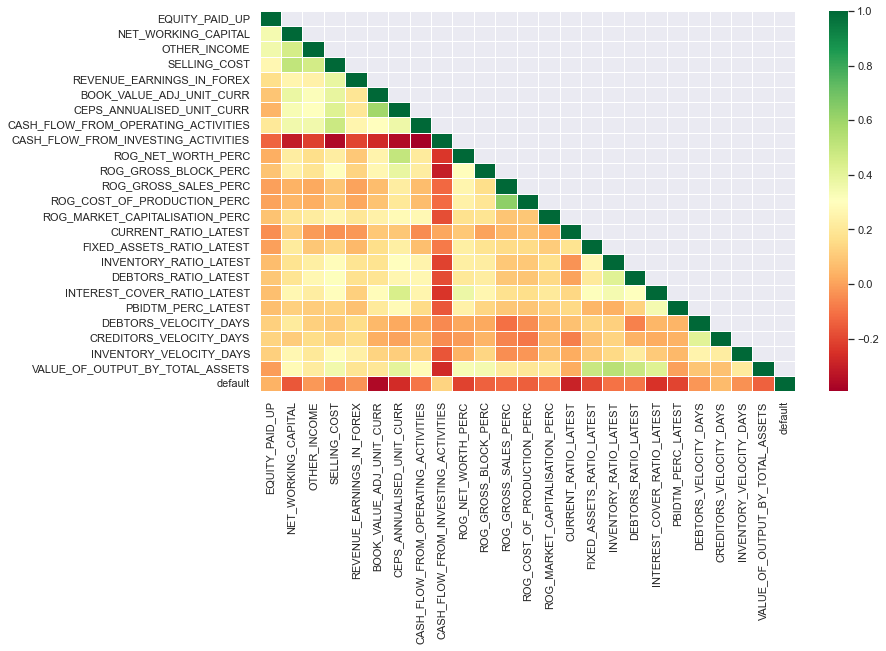

In [46]:
# visualize the correlations in the features of this complete transformed dataframe.
# There arre no heavily corelated features in the data set now

plt.figure(figsize=(12,7))
sns.set(font_scale=1)
corr =df1.corr()
mask=np.triu(corr,+1)
sns.heatmap(corr,
            mask=mask,
            cmap='RdYlGn',
            linecolor='w',
            linewidths=1);

In [47]:
# calculate the variance inflation factor to verify that correlated features are not present
# X - data frame does not include the dependent variable -'default'

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
features=X.columns.to_list()
# compare with each column
pd.DataFrame([vif(X.values, index) for index in range(len(features))],
             index=[features],
             columns=['VIF']).sort_values(by='VIF',ascending=False)

# the gighest vif value is 2.34, wjich is less than 5 , and hence multicolinearity does not exist

,VIF
CEPS_ANNUALISED_UNIT_CURR,2.342458
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS,2.327682
SELLING_COST,2.001325
NET_WORKING_CAPITAL,1.781558
ROG_GROSS_SALES_PERC,1.746198
ROG_COST_OF_PRODUCTION_PERC,1.713397
BOOK_VALUE_ADJ_UNIT_CURR,1.710451
INTEREST_COVER_RATIO_LATEST,1.612414
OTHER_INCOME,1.566357
CASH_FLOW_FROM_OPERATING_ACTIVITIES,1.565049


In [48]:
# split the full transformed data set into train and test again. 
# Rember we had concatenated Train and test data one over the other
# the first 2401 rows are Train Data set
# from rows 2401 to 3585 is the test data set


X_train_final = df1.iloc[:2401]
display(X_train_final)
X_test_final = df1.iloc[2401:3585]
display(X_test_final)

,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS,default
1913,0.124056,-0.183439,0.634139,-0.132107,0.242183,-0.132127,-0.142319,0.945773,-0.861114,0.022281,...,-0.741648,-0.515571,-0.407887,-2.219596,-2.887043,0.103273,0.027194,1.091401,-0.723875,0
2811,0.147981,2.678147,0.199973,-0.475610,-0.325055,1.291481,0.099494,-0.610743,1.986415,0.149129,...,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260,0
3172,0.523167,1.245454,4.084114,1.630015,0.751015,1.208300,1.394429,-0.101220,-0.839033,-0.546536,...,1.670689,0.107887,0.000863,0.662054,0.031487,0.613834,1.061556,0.985968,0.731215,0
1494,-0.343567,1.486209,-0.533545,-0.383326,-0.325055,-0.739478,-0.114221,-0.381730,1.287716,-0.243832,...,-0.125562,0.913138,1.439222,0.063726,-0.797221,-0.600950,-0.901620,-0.718528,1.895287,0
750,-0.728541,-0.536898,-0.576006,-0.506372,-0.325055,-0.479814,-0.479487,-0.313155,0.269328,-0.462266,...,0.538531,-0.838397,-0.918273,-0.339267,-0.313598,-0.935455,-0.922729,-0.841533,-0.907676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,-1.039565,-0.595954,-0.576006,-0.506372,-0.325055,-0.223611,-0.625242,-0.311861,0.275920,-0.429002,...,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260,0
2301,1.609577,1.508721,-0.188547,0.201143,1.328813,-0.505340,-0.091392,-2.235834,0.335243,1.002465,...,-0.081556,-0.251257,0.058309,0.231221,0.014695,-0.336866,-0.669416,2.128156,0.210446,0
2024,0.935329,2.649788,3.197736,2.918410,0.051124,-0.735077,-0.065051,0.617132,-0.602398,0.549407,...,-0.249580,-0.465129,2.691987,2.362565,0.497478,-0.706583,-0.183900,0.915679,1.313251,0
2719,-0.321817,0.872260,0.602293,1.624888,0.428293,0.215266,1.329103,3.321303,-1.579588,1.417158,...,-0.109560,1.100579,1.710986,2.099228,0.814016,-0.301655,-0.310556,0.089789,1.497052,0


,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS,default
350,-0.368580,-0.602678,-0.576006,-0.490991,-0.325055,-0.826327,-0.567291,-0.327387,0.275920,-0.249376,...,-0.637634,-0.059579,0.780803,-0.427350,-1.319467,0.156089,-0.268337,0.247939,0.623998,1
1196,-0.320730,-0.575489,-0.576006,-0.506372,-0.325055,-0.787597,-0.477731,-1.125700,0.275920,0.328311,...,1.178620,-0.838397,-0.865246,-0.567462,1.291762,-0.178416,0.998228,-0.841533,-0.907676,0
2141,1.628064,-0.089300,-0.512314,-0.460230,-0.325055,-0.749748,-0.461926,-0.085435,-0.345988,-0.201032,...,-0.757651,0.350007,-0.266482,0.137661,-0.217797,-0.125600,1.293760,0.307684,-0.815776,0
2267,0.255643,0.075297,0.803984,0.835343,0.139559,0.175656,1.129085,1.260181,-2.736396,1.462619,...,0.086467,-0.170550,0.159944,0.762003,0.281695,-0.178416,1.694839,1.864574,0.853749,0
1458,-0.553454,-0.528420,-0.570698,-0.506372,-0.325055,-0.410570,0.377482,-0.373966,-0.053655,0.292719,...,0.042461,-0.838397,0.453803,-0.282218,2.057498,0.173695,-0.584979,-0.841533,0.639314,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,-0.515392,1.068432,-0.565391,2.108357,-0.173264,0.720512,1.485570,0.976825,0.467074,-0.050900,...,1.602679,0.313689,0.420661,0.089740,-0.366494,0.508201,1.082665,1.126545,2.201622,0
2028,-0.427305,0.105994,-0.183240,2.395464,5.476024,0.501924,1.273084,1.270532,0.233075,1.169894,...,0.130474,0.095781,1.799364,0.970118,-0.265739,-0.143205,-0.901620,0.616953,1.849337,0
1995,0.474230,1.119009,0.384679,0.266255,0.597904,-0.088703,0.366945,0.194039,-1.128400,-0.118537,...,0.266493,0.947236,0.398566,-0.024358,-0.136437,0.138484,-0.563869,-0.226509,0.853749,0
831,-1.028690,-0.534559,-0.570698,-0.121853,-0.325055,2.070475,1.122061,-0.293747,0.249554,-0.048682,...,0.678550,1.683684,2.362777,0.477672,-0.510909,-0.424894,-0.690526,-0.156220,0.853749,0


# Logistic Regression

# Model 1

In [49]:
display(len(X_train_final.columns.to_list()))    # we are starting with 25 features

X_train_final.columns.to_list()

25

['EQUITY_PAID_UP',
 'NET_WORKING_CAPITAL',
 'OTHER_INCOME',
 'SELLING_COST',
 'REVENUE_EARNINGS_IN_FOREX',
 'BOOK_VALUE_ADJ_UNIT_CURR',
 'CEPS_ANNUALISED_UNIT_CURR',
 'CASH_FLOW_FROM_OPERATING_ACTIVITIES',
 'CASH_FLOW_FROM_INVESTING_ACTIVITIES',
 'ROG_NET_WORTH_PERC',
 'ROG_GROSS_BLOCK_PERC',
 'ROG_GROSS_SALES_PERC',
 'ROG_COST_OF_PRODUCTION_PERC',
 'ROG_MARKET_CAPITALISATION_PERC',
 'CURRENT_RATIO_LATEST',
 'FIXED_ASSETS_RATIO_LATEST',
 'INVENTORY_RATIO_LATEST',
 'DEBTORS_RATIO_LATEST',
 'INTEREST_COVER_RATIO_LATEST',
 'PBIDTM_PERC_LATEST',
 'DEBTORS_VELOCITY_DAYS',
 'CREDITORS_VELOCITY_DAYS',
 'INVENTORY_VELOCITY_DAYS',
 'VALUE_OF_OUTPUT_BY_TOTAL_ASSETS',
 'default']

In [50]:
# considering all the 25 features in X_train_final data set

f1 = 'default~EQUITY_PAID_UP+ NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ REVENUE_EARNINGS_IN_FOREX+ BOOK_VALUE_ADJ_UNIT_CURR+ CEPS_ANNUALISED_UNIT_CURR+ CASH_FLOW_FROM_OPERATING_ACTIVITIES+ CASH_FLOW_FROM_INVESTING_ACTIVITIES+ ROG_NET_WORTH_PERC+ ROG_GROSS_BLOCK_PERC+ ROG_GROSS_SALES_PERC+ ROG_COST_OF_PRODUCTION_PERC+ ROG_MARKET_CAPITALISATION_PERC+ CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+ INVENTORY_RATIO_LATEST+ DEBTORS_RATIO_LATEST+ INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+ DEBTORS_VELOCITY_DAYS+ CREDITORS_VELOCITY_DAYS+ INVENTORY_VELOCITY_DAYS+ VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

In [51]:
model1 = SM.logit(formula=f1,data=X_train_final).fit()  # fit the Logistic Regression model from Stats Model

Optimization terminated successfully.
         Current function value: 0.161596
         Iterations 9


In [52]:
model1.summary()    # Result summary for the first itterartion with all 25 features

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           24
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5288
Time:                        13:25:04   Log-Likelihood:                -387.99
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                2.303e-168
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.8395      0.240    -20.127      0.000      -5.311      -4.368
EQUITY_PAID_UP                          0.1146      0.107      1.068      0.286      -0.096       0.325
NET_WORKING_CAPITAL                    -0.2913      0.159     -1.829      0.067      -0.603       0.021
OTHER_INCOME                            0.3743      0.128      2.935      0.003       0.124       0.624
SELLING_COST                            0.4902      0.149      3.280      0.001       0.197       0.783
REVENUE_EARNINGS_IN_FOREX              -0.0241      0.115     -0.210      0.833      -0.249       0.201
BOOK_VALUE_ADJ_UNIT_CURR               -3.2946      0.278    -11.858      0.000      -3.839      -2.750
CEPS_ANNUALISED_UNIT_CURR              -0.2280      0.181     -1.259      0.208      -0.583       0.127
CASH_FLOW_FROM_OPERATING_ACTIVITIES    -0.1293      0.140     -0.924      0.355      -0.404       0.145
CASH_FLOW_FROM_INVESTING_ACTIVITIES     0.1717      0.148      1.163      0.245      -0.118       0.461
ROG_NET_WORTH_PERC                     -0.1415      0.121     -1.168      0.243      -0.379       0.096
ROG_GROSS_BLOCK_PERC                   -0.0819      0.157     -0.522      0.602      -0.389       0.226
ROG_GROSS_SALES_PERC                    0.1560      0.134      1.168      0.243      -0.106       0.418
ROG_COST_OF_PRODUCTION_PERC            -0.4813      0.134     -3.579      0.000      -0.745      -0.218
ROG_MARKET_CAPITALISATION_PERC         -0.0020      0.106     -0.019      0.985      -0.210       0.206
CURRENT_RATIO_LATEST                   -1.5085      0.181     -8.356      0.000      -1.862      -1.155
FIXED_ASSETS_RATIO_LATEST              -0.4430      0.203     -2.186      0.029      -0.840      -0.046
INVENTORY_RATIO_LATEST                 -0.0386      0.129     -0.299      0.765      -0.292       0.215
DEBTORS_RATIO_LATEST                   -0.0445      0.126     -0.354      0.724      -0.291       0.202
INTEREST_COVER_RATIO_LATEST            -0.3723      0.157     -2.369      0.018      -0.680      -0.064
PBIDTM_PERC_LATEST                     -0.1880      0.116     -1.623      0.105      -0.415       0.039
DEBTORS_VELOCITY_DAYS                   0.1628      0.108      1.503      0.133      -0.050       0.375
CREDITORS_VELOCITY_DAYS                 0.1500      0.100      1.497      0.134      -0.046       0.346
INVENTORY_VELOCITY_DAYS                 0.0018      0.117      0.016      0.988      -0.227       0.231
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS         0.3834      0.165      2.328      0.020       0.061       0.706
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### there are a lot of features  whose P-value is more than 0.05, which means that they are not significant, and can be dropped. We drop them one by one and keep checking the P-scores

# Model 2   - we shall start droping features , one at a time , whose p-value is greater than 0.05 , and check the summary again

In [53]:
f2 = 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ REVENUE_EARNINGS_IN_FOREX+ BOOK_VALUE_ADJ_UNIT_CURR+ CEPS_ANNUALISED_UNIT_CURR+ CASH_FLOW_FROM_OPERATING_ACTIVITIES+ CASH_FLOW_FROM_INVESTING_ACTIVITIES+ ROG_NET_WORTH_PERC+ ROG_GROSS_BLOCK_PERC+ ROG_GROSS_SALES_PERC+ ROG_COST_OF_PRODUCTION_PERC+ ROG_MARKET_CAPITALISATION_PERC+ CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+ INVENTORY_RATIO_LATEST+ DEBTORS_RATIO_LATEST+ INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+ DEBTORS_VELOCITY_DAYS+ CREDITORS_VELOCITY_DAYS+ INVENTORY_VELOCITY_DAYS+ VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

In [54]:
model2= SM.logit(formula=f2,data=X_train_final).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.161831
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           23
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5281
Time:                        13:25:04   Log-Likelihood:                -388.56
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                6.405e-169
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.8433      0.240    -20.142      0.000      -5.315      -4.372
NET_WORKING_CAPITAL                    -0.2630      0.158     -1.668      0.095      -0.572       0.046
OTHER_INCOME                            0.3999      0.125      3.193      0.001       0.154       0.645
SELLING_COST                            0.4956      0.149      3.334      0.001       0.204       0.787
REVENUE_EARNINGS_IN_FOREX              -0.0139      0.115     -0.121      0.903      -0.238       0.211
BOOK_VALUE_ADJ_UNIT_CURR               -3.3024      0.278    -11.888      0.000      -3.847      -2.758
CEPS_ANNUALISED_UNIT_CURR              -0.2371      0.181     -1.311      0.190      -0.592       0.117
CASH_FLOW_FROM_OPERATING_ACTIVITIES    -0.1276      0.140     -0.911      0.362      -0.402       0.147
CASH_FLOW_FROM_INVESTING_ACTIVITIES     0.1694      0.149      1.138      0.255      -0.122       0.461
ROG_NET_WORTH_PERC                     -0.1422      0.121     -1.180      0.238      -0.378       0.094
ROG_GROSS_BLOCK_PERC                   -0.0883      0.157     -0.563      0.573      -0.396       0.219
ROG_GROSS_SALES_PERC                    0.1540      0.134      1.151      0.250      -0.108       0.416
ROG_COST_OF_PRODUCTION_PERC            -0.4767      0.134     -3.550      0.000      -0.740      -0.214
ROG_MARKET_CAPITALISATION_PERC         -0.0032      0.106     -0.030      0.976      -0.211       0.205
CURRENT_RATIO_LATEST                   -1.5164      0.181     -8.393      0.000      -1.871      -1.162
FIXED_ASSETS_RATIO_LATEST              -0.4582      0.203     -2.253      0.024      -0.857      -0.060
INVENTORY_RATIO_LATEST                 -0.0343      0.129     -0.266      0.790      -0.287       0.218
DEBTORS_RATIO_LATEST                   -0.0397      0.126     -0.316      0.752      -0.286       0.207
INTEREST_COVER_RATIO_LATEST            -0.3649      0.157     -2.325      0.020      -0.673      -0.057
PBIDTM_PERC_LATEST                     -0.1901      0.115     -1.647      0.100      -0.416       0.036
DEBTORS_VELOCITY_DAYS                   0.1658      0.108      1.531      0.126      -0.046       0.378
CREDITORS_VELOCITY_DAYS                 0.1447      0.100      1.448      0.148      -0.051       0.341
INVENTORY_VELOCITY_DAYS                 0.0108      0.117      0.093      0.926      -0.218       0.239
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS         0.3767      0.165      2.290      0.022       0.054       0.699
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Model 3

In [55]:
f3 = 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ CEPS_ANNUALISED_UNIT_CURR+ CASH_FLOW_FROM_OPERATING_ACTIVITIES+ CASH_FLOW_FROM_INVESTING_ACTIVITIES+ ROG_NET_WORTH_PERC+ ROG_GROSS_BLOCK_PERC+ ROG_GROSS_SALES_PERC+ ROG_COST_OF_PRODUCTION_PERC+ ROG_MARKET_CAPITALISATION_PERC+ CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+ INVENTORY_RATIO_LATEST+ DEBTORS_RATIO_LATEST+ INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+ DEBTORS_VELOCITY_DAYS+ CREDITORS_VELOCITY_DAYS+ INVENTORY_VELOCITY_DAYS+ VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

In [56]:
model3= SM.logit(formula=f3,data=X_train_final).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.161834
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           22
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5281
Time:                        13:25:04   Log-Likelihood:                -388.56
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                1.013e-169
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.8438      0.240    -20.146      0.000      -5.315      -4.373
NET_WORKING_CAPITAL                    -0.2630      0.158     -1.669      0.095      -0.572       0.046
OTHER_INCOME                            0.4001      0.125      3.194      0.001       0.155       0.646
SELLING_COST                            0.4918      0.145      3.382      0.001       0.207       0.777
BOOK_VALUE_ADJ_UNIT_CURR               -3.3041      0.278    -11.904      0.000      -3.848      -2.760
CEPS_ANNUALISED_UNIT_CURR              -0.2360      0.181     -1.307      0.191      -0.590       0.118
CASH_FLOW_FROM_OPERATING_ACTIVITIES    -0.1289      0.140     -0.923      0.356      -0.403       0.145
CASH_FLOW_FROM_INVESTING_ACTIVITIES     0.1688      0.149      1.134      0.257      -0.123       0.461
ROG_NET_WORTH_PERC                     -0.1423      0.121     -1.180      0.238      -0.378       0.094
ROG_GROSS_BLOCK_PERC                   -0.0875      0.157     -0.559      0.576      -0.395       0.220
ROG_GROSS_SALES_PERC                    0.1542      0.134      1.153      0.249      -0.108       0.416
ROG_COST_OF_PRODUCTION_PERC            -0.4772      0.134     -3.556      0.000      -0.740      -0.214
ROG_MARKET_CAPITALISATION_PERC         -0.0043      0.106     -0.041      0.968      -0.211       0.203
CURRENT_RATIO_LATEST                   -1.5150      0.180     -8.405      0.000      -1.868      -1.162
FIXED_ASSETS_RATIO_LATEST              -0.4582      0.203     -2.253      0.024      -0.857      -0.060
INVENTORY_RATIO_LATEST                 -0.0339      0.129     -0.263      0.793      -0.287       0.219
DEBTORS_RATIO_LATEST                   -0.0402      0.126     -0.320      0.749      -0.286       0.206
INTEREST_COVER_RATIO_LATEST            -0.3645      0.157     -2.323      0.020      -0.672      -0.057
PBIDTM_PERC_LATEST                     -0.1901      0.115     -1.647      0.100      -0.416       0.036
DEBTORS_VELOCITY_DAYS                   0.1648      0.108      1.526      0.127      -0.047       0.376
CREDITORS_VELOCITY_DAYS                 0.1436      0.100      1.442      0.149      -0.052       0.339
INVENTORY_VELOCITY_DAYS                 0.0087      0.115      0.076      0.940      -0.217       0.235
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS         0.3762      0.165      2.287      0.022       0.054       0.699
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Model 4

In [57]:
f4 = 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ CEPS_ANNUALISED_UNIT_CURR+ CASH_FLOW_FROM_OPERATING_ACTIVITIES+ CASH_FLOW_FROM_INVESTING_ACTIVITIES+ ROG_NET_WORTH_PERC+ ROG_GROSS_BLOCK_PERC+ ROG_GROSS_SALES_PERC+ ROG_COST_OF_PRODUCTION_PERC+ ROG_MARKET_CAPITALISATION_PERC+ CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+ INVENTORY_RATIO_LATEST+ DEBTORS_RATIO_LATEST+ INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+ DEBTORS_VELOCITY_DAYS+ CREDITORS_VELOCITY_DAYS+ INVENTORY_VELOCITY_DAYS+ VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

model4 = SM.logit(formula=f4,data=X_train_final).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.161834
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           22
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5281
Time:                        13:25:05   Log-Likelihood:                -388.56
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                1.013e-169
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.8438      0.240    -20.146      0.000      -5.315      -4.373
NET_WORKING_CAPITAL                    -0.2630      0.158     -1.669      0.095      -0.572       0.046
OTHER_INCOME                            0.4001      0.125      3.194      0.001       0.155       0.646
SELLING_COST                            0.4918      0.145      3.382      0.001       0.207       0.777
BOOK_VALUE_ADJ_UNIT_CURR               -3.3041      0.278    -11.904      0.000      -3.848      -2.760
CEPS_ANNUALISED_UNIT_CURR              -0.2360      0.181     -1.307      0.191      -0.590       0.118
CASH_FLOW_FROM_OPERATING_ACTIVITIES    -0.1289      0.140     -0.923      0.356      -0.403       0.145
CASH_FLOW_FROM_INVESTING_ACTIVITIES     0.1688      0.149      1.134      0.257      -0.123       0.461
ROG_NET_WORTH_PERC                     -0.1423      0.121     -1.180      0.238      -0.378       0.094
ROG_GROSS_BLOCK_PERC                   -0.0875      0.157     -0.559      0.576      -0.395       0.220
ROG_GROSS_SALES_PERC                    0.1542      0.134      1.153      0.249      -0.108       0.416
ROG_COST_OF_PRODUCTION_PERC            -0.4772      0.134     -3.556      0.000      -0.740      -0.214
ROG_MARKET_CAPITALISATION_PERC         -0.0043      0.106     -0.041      0.968      -0.211       0.203
CURRENT_RATIO_LATEST                   -1.5150      0.180     -8.405      0.000      -1.868      -1.162
FIXED_ASSETS_RATIO_LATEST              -0.4582      0.203     -2.253      0.024      -0.857      -0.060
INVENTORY_RATIO_LATEST                 -0.0339      0.129     -0.263      0.793      -0.287       0.219
DEBTORS_RATIO_LATEST                   -0.0402      0.126     -0.320      0.749      -0.286       0.206
INTEREST_COVER_RATIO_LATEST            -0.3645      0.157     -2.323      0.020      -0.672      -0.057
PBIDTM_PERC_LATEST                     -0.1901      0.115     -1.647      0.100      -0.416       0.036
DEBTORS_VELOCITY_DAYS                   0.1648      0.108      1.526      0.127      -0.047       0.376
CREDITORS_VELOCITY_DAYS                 0.1436      0.100      1.442      0.149      -0.052       0.339
INVENTORY_VELOCITY_DAYS                 0.0087      0.115      0.076      0.940      -0.217       0.235
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS         0.3762      0.165      2.287      0.022       0.054       0.699
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Model 5

In [58]:
f5 = 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ CEPS_ANNUALISED_UNIT_CURR+ CASH_FLOW_FROM_OPERATING_ACTIVITIES+ CASH_FLOW_FROM_INVESTING_ACTIVITIES+ ROG_NET_WORTH_PERC+ ROG_GROSS_BLOCK_PERC+ ROG_GROSS_SALES_PERC+ ROG_COST_OF_PRODUCTION_PERC+ ROG_MARKET_CAPITALISATION_PERC+ CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+ INVENTORY_RATIO_LATEST+ DEBTORS_RATIO_LATEST+ INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+ DEBTORS_VELOCITY_DAYS+ CREDITORS_VELOCITY_DAYS+VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

model5 = SM.logit(formula=f5,data=X_train_final).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.161835
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           21
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5281
Time:                        13:25:05   Log-Likelihood:                -388.57
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                1.559e-170
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.8443      0.240    -20.153      0.000      -5.315      -4.373
NET_WORKING_CAPITAL                    -0.2620      0.157     -1.669      0.095      -0.570       0.046
OTHER_INCOME                            0.4000      0.125      3.194      0.001       0.155       0.646
SELLING_COST                            0.4931      0.144      3.418      0.001       0.210       0.776
BOOK_VALUE_ADJ_UNIT_CURR               -3.3030      0.277    -11.918      0.000      -3.846      -2.760
CEPS_ANNUALISED_UNIT_CURR              -0.2363      0.181     -1.308      0.191      -0.590       0.118
CASH_FLOW_FROM_OPERATING_ACTIVITIES    -0.1289      0.140     -0.923      0.356      -0.403       0.145
CASH_FLOW_FROM_INVESTING_ACTIVITIES     0.1683      0.149      1.132      0.258      -0.123       0.460
ROG_NET_WORTH_PERC                     -0.1430      0.120     -1.191      0.234      -0.378       0.092
ROG_GROSS_BLOCK_PERC                   -0.0874      0.157     -0.558      0.577      -0.394       0.220
ROG_GROSS_SALES_PERC                    0.1534      0.133      1.151      0.250      -0.108       0.415
ROG_COST_OF_PRODUCTION_PERC            -0.4778      0.134     -3.565      0.000      -0.740      -0.215
ROG_MARKET_CAPITALISATION_PERC         -0.0045      0.106     -0.043      0.966      -0.212       0.203
CURRENT_RATIO_LATEST                   -1.5145      0.180     -8.408      0.000      -1.868      -1.162
FIXED_ASSETS_RATIO_LATEST              -0.4577      0.203     -2.252      0.024      -0.856      -0.059
INVENTORY_RATIO_LATEST                 -0.0340      0.129     -0.264      0.792      -0.287       0.219
DEBTORS_RATIO_LATEST                   -0.0390      0.125     -0.313      0.754      -0.283       0.205
INTEREST_COVER_RATIO_LATEST            -0.3654      0.156     -2.336      0.019      -0.672      -0.059
PBIDTM_PERC_LATEST                     -0.1900      0.115     -1.646      0.100      -0.416       0.036
DEBTORS_VELOCITY_DAYS                   0.1659      0.107      1.553      0.120      -0.043       0.375
CREDITORS_VELOCITY_DAYS                 0.1445      0.099      1.463      0.144      -0.049       0.338
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS         0.3772      0.164      2.300      0.021       0.056       0.699
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Model 6

In [59]:
f6 = 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ CEPS_ANNUALISED_UNIT_CURR+ CASH_FLOW_FROM_OPERATING_ACTIVITIES+ CASH_FLOW_FROM_INVESTING_ACTIVITIES+ ROG_NET_WORTH_PERC+ ROG_GROSS_BLOCK_PERC+ ROG_GROSS_SALES_PERC+ ROG_COST_OF_PRODUCTION_PERC+CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+ INVENTORY_RATIO_LATEST+ DEBTORS_RATIO_LATEST+ INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+ DEBTORS_VELOCITY_DAYS+ CREDITORS_VELOCITY_DAYS+VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

model6 = SM.logit(formula=f6,data=X_train_final).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.161836
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           20
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5281
Time:                        13:25:05   Log-Likelihood:                -388.57
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                2.334e-171
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.8438      0.240    -20.171      0.000      -5.315      -4.373
NET_WORKING_CAPITAL                    -0.2619      0.157     -1.669      0.095      -0.569       0.046
OTHER_INCOME                            0.4000      0.125      3.193      0.001       0.154       0.646
SELLING_COST                            0.4929      0.144      3.419      0.001       0.210       0.776
BOOK_VALUE_ADJ_UNIT_CURR               -3.3034      0.277    -11.926      0.000      -3.846      -2.761
CEPS_ANNUALISED_UNIT_CURR              -0.2361      0.180     -1.308      0.191      -0.590       0.118
CASH_FLOW_FROM_OPERATING_ACTIVITIES    -0.1291      0.140     -0.925      0.355      -0.403       0.145
CASH_FLOW_FROM_INVESTING_ACTIVITIES     0.1684      0.149      1.133      0.257      -0.123       0.460
ROG_NET_WORTH_PERC                     -0.1429      0.120     -1.190      0.234      -0.378       0.092
ROG_GROSS_BLOCK_PERC                   -0.0873      0.157     -0.557      0.577      -0.394       0.220
ROG_GROSS_SALES_PERC                    0.1535      0.133      1.152      0.249      -0.108       0.415
ROG_COST_OF_PRODUCTION_PERC            -0.4782      0.134     -3.580      0.000      -0.740      -0.216
CURRENT_RATIO_LATEST                   -1.5146      0.180     -8.409      0.000      -1.868      -1.162
FIXED_ASSETS_RATIO_LATEST              -0.4579      0.203     -2.253      0.024      -0.856      -0.060
INVENTORY_RATIO_LATEST                 -0.0341      0.129     -0.265      0.791      -0.287       0.218
DEBTORS_RATIO_LATEST                   -0.0390      0.125     -0.313      0.755      -0.283       0.205
INTEREST_COVER_RATIO_LATEST            -0.3655      0.156     -2.338      0.019      -0.672      -0.059
PBIDTM_PERC_LATEST                     -0.1901      0.115     -1.648      0.099      -0.416       0.036
DEBTORS_VELOCITY_DAYS                   0.1658      0.107      1.553      0.121      -0.043       0.375
CREDITORS_VELOCITY_DAYS                 0.1444      0.099      1.462      0.144      -0.049       0.338
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS         0.3769      0.164      2.300      0.021       0.056       0.698
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [60]:
f7 = 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ CEPS_ANNUALISED_UNIT_CURR+ CASH_FLOW_FROM_OPERATING_ACTIVITIES+ CASH_FLOW_FROM_INVESTING_ACTIVITIES+ ROG_NET_WORTH_PERC+ ROG_GROSS_BLOCK_PERC+ ROG_GROSS_SALES_PERC+ ROG_COST_OF_PRODUCTION_PERC+CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+ DEBTORS_VELOCITY_DAYS+ CREDITORS_VELOCITY_DAYS+VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

model7 = SM.logit(formula=f7,data=X_train_final).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.161878
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           18
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5279
Time:                        13:25:05   Log-Likelihood:                -388.67
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                5.333e-173
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.8378      0.239    -20.212      0.000      -5.307      -4.369
NET_WORKING_CAPITAL                    -0.2557      0.157     -1.634      0.102      -0.562       0.051
OTHER_INCOME                            0.3921      0.124      3.170      0.002       0.150       0.635
SELLING_COST                            0.4824      0.142      3.390      0.001       0.203       0.761
BOOK_VALUE_ADJ_UNIT_CURR               -3.3063      0.277    -11.949      0.000      -3.849      -2.764
CEPS_ANNUALISED_UNIT_CURR              -0.2310      0.180     -1.285      0.199      -0.583       0.121
CASH_FLOW_FROM_OPERATING_ACTIVITIES    -0.1303      0.139     -0.934      0.350      -0.404       0.143
CASH_FLOW_FROM_INVESTING_ACTIVITIES     0.1696      0.148      1.144      0.253      -0.121       0.460
ROG_NET_WORTH_PERC                     -0.1450      0.120     -1.212      0.225      -0.380       0.089
ROG_GROSS_BLOCK_PERC                   -0.0870      0.156     -0.556      0.578      -0.393       0.220
ROG_GROSS_SALES_PERC                    0.1546      0.133      1.161      0.246      -0.106       0.416
ROG_COST_OF_PRODUCTION_PERC            -0.4774      0.134     -3.573      0.000      -0.739      -0.215
CURRENT_RATIO_LATEST                   -1.5145      0.180     -8.413      0.000      -1.867      -1.162
FIXED_ASSETS_RATIO_LATEST              -0.4543      0.202     -2.248      0.025      -0.850      -0.058
INTEREST_COVER_RATIO_LATEST            -0.3696      0.156     -2.369      0.018      -0.675      -0.064
PBIDTM_PERC_LATEST                     -0.1889      0.115     -1.645      0.100      -0.414       0.036
DEBTORS_VELOCITY_DAYS                   0.1647      0.105      1.563      0.118      -0.042       0.371
CREDITORS_VELOCITY_DAYS                 0.1392      0.098      1.418      0.156      -0.053       0.332
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS         0.3418      0.144      2.373      0.018       0.059       0.624
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [61]:
f8 = 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ROG_GROSS_SALES_PERC+ ROG_COST_OF_PRODUCTION_PERC+CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+ DEBTORS_VELOCITY_DAYS+ CREDITORS_VELOCITY_DAYS+VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

model8 = SM.logit(formula=f8,data=X_train_final).fit()
model8.summary()

Optimization terminated successfully.
         Current function value: 0.163429
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           13
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5234
Time:                        13:25:05   Log-Likelihood:                -392.39
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                7.447e-176
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.7879      0.233    -20.512      0.000      -5.245      -4.330
NET_WORKING_CAPITAL                -0.3257      0.152     -2.140      0.032      -0.624      -0.027
OTHER_INCOME                        0.3682      0.120      3.071      0.002       0.133       0.603
SELLING_COST                        0.4349      0.136      3.200      0.001       0.169       0.701
BOOK_VALUE_ADJ_UNIT_CURR           -3.3902      0.269    -12.588      0.000      -3.918      -2.862
ROG_GROSS_SALES_PERC                0.1448      0.133      1.087      0.277      -0.116       0.406
ROG_COST_OF_PRODUCTION_PERC        -0.5186      0.133     -3.892      0.000      -0.780      -0.257
CURRENT_RATIO_LATEST               -1.5566      0.178     -8.752      0.000      -1.905      -1.208
FIXED_ASSETS_RATIO_LATEST          -0.4396      0.202     -2.176      0.030      -0.836      -0.044
INTEREST_COVER_RATIO_LATEST        -0.4244      0.153     -2.781      0.005      -0.723      -0.125
PBIDTM_PERC_LATEST                 -0.2388      0.113     -2.105      0.035      -0.461      -0.016
DEBTORS_VELOCITY_DAYS               0.1812      0.105      1.731      0.083      -0.024       0.386
CREDITORS_VELOCITY_DAYS             0.1336      0.098      1.367      0.172      -0.058       0.325
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS     0.2730      0.141      1.933      0.053      -0.004       0.550
===================================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [62]:
f9 = 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ROG_COST_OF_PRODUCTION_PERC+CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+ DEBTORS_VELOCITY_DAYS+ CREDITORS_VELOCITY_DAYS+VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

model9 = SM.logit(formula=f9,data=X_train_final).fit()
model9.summary()

Optimization terminated successfully.
         Current function value: 0.163673
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           12
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5227
Time:                        13:25:05   Log-Likelihood:                -392.98
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                1.534e-176
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.7760      0.233    -20.536      0.000      -5.232      -4.320
NET_WORKING_CAPITAL                -0.3307      0.152     -2.175      0.030      -0.629      -0.033
OTHER_INCOME                        0.3633      0.120      3.039      0.002       0.129       0.598
SELLING_COST                        0.4326      0.136      3.178      0.001       0.166       0.699
BOOK_VALUE_ADJ_UNIT_CURR           -3.3788      0.269    -12.539      0.000      -3.907      -2.851
ROG_COST_OF_PRODUCTION_PERC        -0.4414      0.112     -3.941      0.000      -0.661      -0.222
CURRENT_RATIO_LATEST               -1.5300      0.176     -8.715      0.000      -1.874      -1.186
FIXED_ASSETS_RATIO_LATEST          -0.4425      0.202     -2.192      0.028      -0.838      -0.047
INTEREST_COVER_RATIO_LATEST        -0.4161      0.152     -2.733      0.006      -0.715      -0.118
PBIDTM_PERC_LATEST                 -0.2456      0.114     -2.152      0.031      -0.469      -0.022
DEBTORS_VELOCITY_DAYS               0.1580      0.103      1.538      0.124      -0.043       0.359
CREDITORS_VELOCITY_DAYS             0.1411      0.098      1.444      0.149      -0.050       0.333
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS     0.2875      0.140      2.047      0.041       0.012       0.563
===================================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [63]:
f10 = 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ROG_COST_OF_PRODUCTION_PERC+CURRENT_RATIO_LATEST+ FIXED_ASSETS_RATIO_LATEST+INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

model10 = SM.logit(formula=f10,data=X_train_final).fit()
model10.summary()

Optimization terminated successfully.
         Current function value: 0.165102
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           10
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5185
Time:                        13:25:05   Log-Likelihood:                -396.41
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                5.313e-177
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.7480      0.230    -20.606      0.000      -5.200      -4.296
NET_WORKING_CAPITAL                -0.2952      0.149     -1.987      0.047      -0.586      -0.004
OTHER_INCOME                        0.3869      0.119      3.261      0.001       0.154       0.619
SELLING_COST                        0.4486      0.134      3.340      0.001       0.185       0.712
BOOK_VALUE_ADJ_UNIT_CURR           -3.3850      0.269    -12.571      0.000      -3.913      -2.857
ROG_COST_OF_PRODUCTION_PERC        -0.4780      0.112     -4.277      0.000      -0.697      -0.259
CURRENT_RATIO_LATEST               -1.4884      0.173     -8.612      0.000      -1.827      -1.150
FIXED_ASSETS_RATIO_LATEST          -0.3483      0.192     -1.815      0.070      -0.724       0.028
INTEREST_COVER_RATIO_LATEST        -0.4895      0.150     -3.272      0.001      -0.783      -0.196
PBIDTM_PERC_LATEST                 -0.2171      0.112     -1.942      0.052      -0.436       0.002
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS     0.3019      0.139      2.179      0.029       0.030       0.573
===================================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [64]:
f11= 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ROG_COST_OF_PRODUCTION_PERC+CURRENT_RATIO_LATEST+INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST+VALUE_OF_OUTPUT_BY_TOTAL_ASSETS'

model11 = SM.logit(formula=f11,data=X_train_final).fit()
model11.summary()

Optimization terminated successfully.
         Current function value: 0.165884
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                            9
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5163
Time:                        13:25:05   Log-Likelihood:                -398.29
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                3.418e-177
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.7347      0.229    -20.653      0.000      -5.184      -4.285
NET_WORKING_CAPITAL                -0.3132      0.149     -2.102      0.036      -0.605      -0.021
OTHER_INCOME                        0.3864      0.118      3.276      0.001       0.155       0.618
SELLING_COST                        0.4575      0.133      3.440      0.001       0.197       0.718
BOOK_VALUE_ADJ_UNIT_CURR           -3.4391      0.270    -12.720      0.000      -3.969      -2.909
ROG_COST_OF_PRODUCTION_PERC        -0.4895      0.111     -4.398      0.000      -0.708      -0.271
CURRENT_RATIO_LATEST               -1.5354      0.172     -8.933      0.000      -1.872      -1.199
INTEREST_COVER_RATIO_LATEST        -0.5266      0.149     -3.546      0.000      -0.818      -0.235
PBIDTM_PERC_LATEST                 -0.2217      0.112     -1.980      0.048      -0.441      -0.002
VALUE_OF_OUTPUT_BY_TOTAL_ASSETS     0.1741      0.120      1.455      0.146      -0.060       0.408
===================================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [65]:
f12= 'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ROG_COST_OF_PRODUCTION_PERC+CURRENT_RATIO_LATEST+INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST'

model12 = SM.logit(formula=f12,data=X_train_final).fit()
model12.summary()

Optimization terminated successfully.
         Current function value: 0.166318
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            8
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5150
Time:                        13:25:05   Log-Likelihood:                -399.33
converged:                       True   LL-Null:                       -823.35
Covariance Type:            nonrobust   LLR p-value:                9.034e-178
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -4.7205      0.229    -20.634      0.000      -5.169      -4.272
NET_WORKING_CAPITAL            -0.3027      0.149     -2.028      0.043      -0.595      -0.010
OTHER_INCOME                    0.4031      0.118      3.424      0.001       0.172       0.634
SELLING_COST                    0.4977      0.130      3.838      0.000       0.244       0.752
BOOK_VALUE_ADJ_UNIT_CURR       -3.4553      0.270    -12.793      0.000      -3.985      -2.926
ROG_COST_OF_PRODUCTION_PERC    -0.4675      0.110     -4.256      0.000      -0.683      -0.252
CURRENT_RATIO_LATEST           -1.4824      0.164     -9.021      0.000      -1.804      -1.160
INTEREST_COVER_RATIO_LATEST    -0.4515      0.138     -3.261      0.001      -0.723      -0.180
PBIDTM_PERC_LATEST             -0.2307      0.111     -2.077      0.038      -0.448      -0.013
===============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# We finally have a model in which there are only 8 significant features

In [66]:
# the list of 8 features that are statistically significant


final_features =model12.params.index[1:].values
final_features

array(['NET_WORKING_CAPITAL', 'OTHER_INCOME', 'SELLING_COST',
       'BOOK_VALUE_ADJ_UNIT_CURR', 'ROG_COST_OF_PRODUCTION_PERC',
       'CURRENT_RATIO_LATEST', 'INTEREST_COVER_RATIO_LATEST',
       'PBIDTM_PERC_LATEST'], dtype=object)

In [67]:
y_train_lr_prob=model12.predict(X_train_final[final_features])   # predict probabilities on train data with 
                                                                 # only the final features

y_test_lr_prob = model12.predict(X_test_final[final_features])    # predict probabilities on test data with 
                                                                 # only the final features

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [69]:
# predict the outcome in the train data ( 0 or 1), if probability is > = 0.5 , prediction is 1 .
# if probability is < 0.5 , prediction is 0

y_train_lr =[]
for i in range (0,len(y_train_lr_prob)):
    if np.array(y_train_lr_prob)[i] > 0.5:
        a=1
    else:
        a=0
    y_train_lr.append(a)

In [70]:
# predict the outcome in the test data ( 0 or 1), if probability is > = 0.5 , prediction is 1 .
# if probability is < 0.5 , prediction is 0


y_test_lr =[]
for i in range (0,len(y_test_lr_prob)):
    if np.array(y_test_lr_prob)[i] > 0.5:
        a=1
    else:
        a=0
    y_test_lr.append(a)

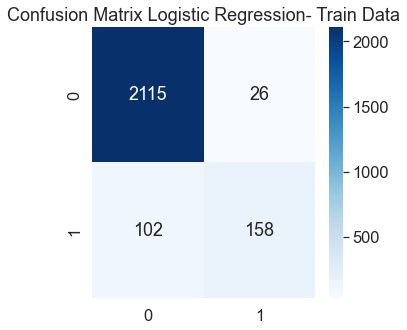

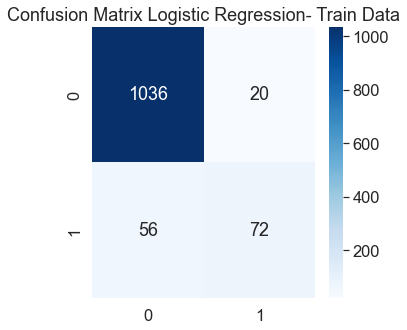

In [129]:
# Print the Confusion Matrix for Train and Test data


cm_train_lr = confusion_matrix(y_train,y_train_lr)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_train_lr,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix Logistic Regression- Train Data');
print('\n')



cm_test_lr = confusion_matrix(y_test,y_test_lr)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_test_lr,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix Logistic Regression- Train Data');
print('\n')

In [128]:
# Classification reports


print('Classification Report - Logistic Regression- Train Data');
print('\n')
cr_train_lr = classification_report(y_train,y_train_lr)
print(cr_train_lr
     
     
     )
print('Classifiaction Report - Logistic Regression- Test Data');
print('\n')
cr_test_lr = classification_report(y_test,y_test_lr)
print(cr_test_lr)

Classification Report - Logistic Regression- Train Data


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2141
           1       0.86      0.61      0.71       260

    accuracy                           0.95      2401
   macro avg       0.91      0.80      0.84      2401
weighted avg       0.94      0.95      0.94      2401

Classifiaction Report - Logistic Regression- Test Data


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1056
           1       0.78      0.56      0.65       128

    accuracy                           0.94      1184
   macro avg       0.87      0.77      0.81      1184
weighted avg       0.93      0.94      0.93      1184



In [73]:
model12.predict()

array([1.99254590e-01, 8.13671080e-05, 6.44897618e-04, ...,
       2.80445066e-01, 3.04303245e-03, 2.81117448e-02])

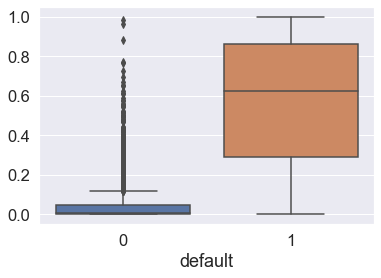

In [74]:
# visualize the 


sns.boxplot(x=X_train_final['default'],
           y=model12.predict());

In [75]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds =roc_curve(y_train,y_train_lr_prob)

In [76]:
optimal_idx = np.argmax(tpr-fpr)   # will return the index where (true positive rate - false positive rate) is maximum 

optimal_threshold = thresholds[optimal_idx]  # returns  the threshold at the optimum index
optimal_threshold

0.16536318554473756

In [77]:
# apply optimal threshold probabilty to make predictions in train data

y_train_lr_optimised_threshold = []
for i in range (0,len(y_train_lr_prob)):
    if np.array(y_train_lr_prob)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_train_lr_optimised_threshold.append(a)

In [78]:
# apply optimal threshold probabilty to make predictions in test data


y_test_lr_optimised_threshold = []
for i in range (0,len(y_test_lr_prob)):
    if np.array(y_test_lr_prob)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_test_lr_optimised_threshold.append(a)


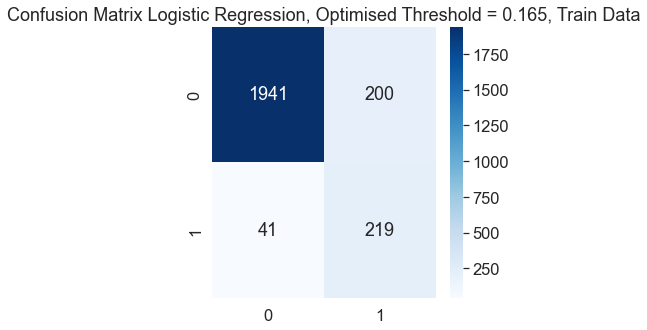

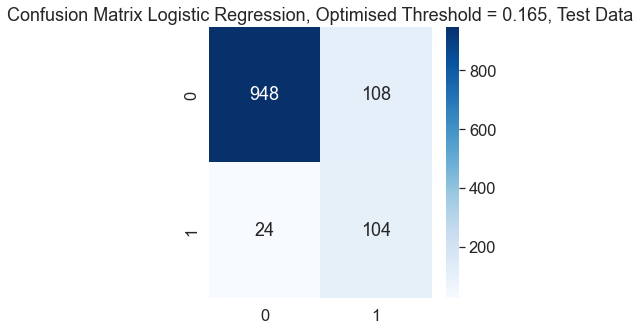

In [79]:
# revised confusion matrix with optimal threshold probability

cm_train_optimised_threshold = confusion_matrix(y_train,y_train_lr_optimised_threshold)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_train_optimised_threshold,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix Logistic Regression, Optimised Threshold = 0.165, Train Data');
print('\n')


cm_test_optimised_threshold = confusion_matrix(y_test,y_test_lr_optimised_threshold)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_test_optimised_threshold,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix Logistic Regression, Optimised Threshold = 0.165, Test Data');
print('\n')

In [80]:
# revised classification reports  with optimal threshold probability

print('Classification Report - Logistic Regression, Optimised Threshold = 0.165, Train Data');
print('\n')
cr_train_optimised_threshold = classification_report(y_train,y_train_lr_optimised_threshold)
print(cr_train_optimised_threshold)
print('Classification Report - Logistic Regression, Optimised Threshold = 0.165, Test Data');
print('\n')
cr_test_optimised_threshold = classification_report(y_test,y_test_lr_optimised_threshold)
print(cr_test_optimised_threshold)


Classification Report - Logistic Regression, Optimised Threshold = 0.165, Train Data


              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2141
           1       0.52      0.84      0.65       260

    accuracy                           0.90      2401
   macro avg       0.75      0.87      0.79      2401
weighted avg       0.93      0.90      0.91      2401

Classification Report - Logistic Regression, Optimised Threshold = 0.165, Test Data


              precision    recall  f1-score   support

           0       0.98      0.90      0.93      1056
           1       0.49      0.81      0.61       128

    accuracy                           0.89      1184
   macro avg       0.73      0.86      0.77      1184
weighted avg       0.92      0.89      0.90      1184



# Balance the Data with SMOTE

In [81]:
y.value_counts()

default
0          3197
1           388
dtype: int64

In [82]:
388/3197

0.12136377854238349

In [83]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=seed,sampling_strategy=0.15)  # sampling strategy 75 % 0 and 25 % 1

In [84]:
X_train_smote, y_train_smote = sm.fit_resample(X_train_final[final_features], y_train)


In [85]:
X_train_smote_concat = pd.concat([X_train_smote,y_train_smote],axis=1)
X_test_smote_concat= X_test_final

In [86]:
f12


'default~NET_WORKING_CAPITAL+ OTHER_INCOME+ SELLING_COST+ BOOK_VALUE_ADJ_UNIT_CURR+ROG_COST_OF_PRODUCTION_PERC+CURRENT_RATIO_LATEST+INTEREST_COVER_RATIO_LATEST+ PBIDTM_PERC_LATEST'

In [87]:
X_train_smote_concat

,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,BOOK_VALUE_ADJ_UNIT_CURR,ROG_COST_OF_PRODUCTION_PERC,CURRENT_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,default
0,-0.183439,0.634139,-0.132107,-0.132127,-1.441811,-0.192394,-2.219596,-2.887043,0
1,2.678147,0.199973,-0.475610,1.291481,-0.053551,-0.179360,-0.567462,-0.807296,0
2,1.245454,4.084114,1.630015,1.208300,-0.562372,0.328957,0.662054,0.031487,0
3,1.486209,-0.533545,-0.383326,-0.739478,0.142621,0.009629,0.063726,-0.797221,0
4,-0.536898,-0.576006,-0.506372,-0.479814,-0.194099,0.166966,-0.339267,-0.313598,0
...,...,...,...,...,...,...,...,...,...
2457,0.718316,0.447777,-0.154669,-1.840864,-0.794819,-0.960886,-0.399301,-0.341326,1
2458,-1.915630,1.968799,-0.432155,-0.693619,-0.724299,-1.147655,-0.569791,-0.147017,1
2459,-0.621223,-0.554417,-0.504721,-1.183914,-0.441169,-1.253087,-0.567462,-0.807296,1
2460,-0.324251,-0.295471,-0.210596,-1.412560,-1.152845,-0.725490,-2.404708,-1.192130,1


In [88]:
model13_smote = SM.logit(formula=f12,data=X_train_smote_concat).fit()
model13_smote.summary()

Optimization terminated successfully.
         Current function value: 0.176433
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2462
Model:                          Logit   Df Residuals:                     2453
Method:                           MLE   Df Model:                            8
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.5442
Time:                        13:25:06   Log-Likelihood:                -434.38
converged:                       True   LL-Null:                       -953.07
Covariance Type:            nonrobust   LLR p-value:                1.271e-218
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -4.7202      0.224    -21.077      0.000      -5.159      -4.281
NET_WORKING_CAPITAL            -0.3357      0.146     -2.296      0.022      -0.622      -0.049
OTHER_INCOME                    0.3711      0.116      3.186      0.001       0.143       0.599
SELLING_COST                    0.5132      0.128      4.014      0.000       0.263       0.764
BOOK_VALUE_ADJ_UNIT_CURR       -3.5697      0.264    -13.544      0.000      -4.086      -3.053
ROG_COST_OF_PRODUCTION_PERC    -0.4979      0.108     -4.627      0.000      -0.709      -0.287
CURRENT_RATIO_LATEST           -1.5934      0.161     -9.915      0.000      -1.908      -1.278
INTEREST_COVER_RATIO_LATEST    -0.4369      0.135     -3.229      0.001      -0.702      -0.172
PBIDTM_PERC_LATEST             -0.2413      0.106     -2.281      0.023      -0.449      -0.034
===============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [89]:
y_train_smote_prob=model13_smote.predict(X_train_smote_concat[final_features])
y_test_smote_prob = model13_smote.predict(X_test_smote_concat[final_features])
len(y_test_smote_prob)

1184

In [90]:
fpr,tpr,thresholds =roc_curve(y_train_smote,y_train_smote_prob)

optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_smote = thresholds[optimal_idx]
optimal_threshold_smote

0.16544593172072497

In [91]:
y_train_pred_smote = []
for i in range (0,len(y_train_smote_prob)):
    if np.array(y_train_smote_prob)[i] > optimal_threshold_smote:
        a=1
    else:
        a=0
    y_train_pred_smote.append(a)

In [92]:
y_test_pred_smote = []
for i in range (0,len(y_test_smote_prob)):
    if np.array(y_test_smote_prob)[i] > optimal_threshold_smote:
        a=1
    else:
        a=0
    y_test_pred_smote.append(a)
len(y_test_pred_smote)

1184

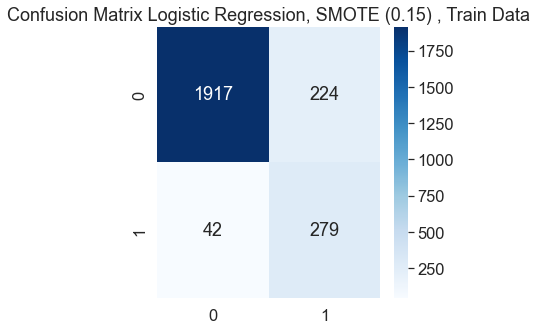

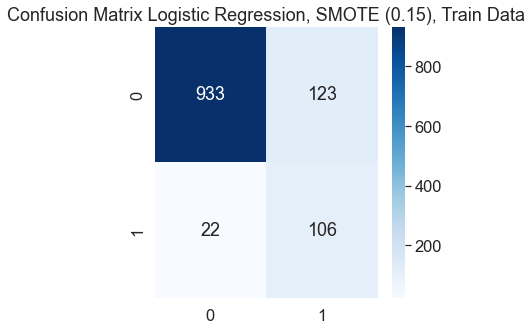

In [93]:
cm_train_smote = confusion_matrix(y_train_smote,y_train_pred_smote)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_train_smote,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix Logistic Regression, SMOTE (0.15) , Train Data');
print('\n') 


cm_test_smote = confusion_matrix(y_test,y_test_pred_smote)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_test_smote,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix Logistic Regression, SMOTE (0.15), Train Data');
print('\n')

In [94]:
cr_train_smote = classification_report(y_train_smote,y_train_pred_smote)
cr_test_smote = classification_report(y_test,y_test_pred_smote)
print('Classification Report- Logistic Regression, SMOTE (0.15) , Train Data')
print('\n')
print(cr_train_smote,'\n')
print('Classification Report- Logistic Regression, SMOTE (0.15) , Test Data')
print('\n')
print(cr_test_smote)

Classification Report- Logistic Regression, SMOTE (0.15) , Train Data


              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2141
           1       0.55      0.87      0.68       321

    accuracy                           0.89      2462
   macro avg       0.77      0.88      0.81      2462
weighted avg       0.92      0.89      0.90      2462
 

Classification Report- Logistic Regression, SMOTE (0.15) , Test Data


              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1056
           1       0.46      0.83      0.59       128

    accuracy                           0.88      1184
   macro avg       0.72      0.86      0.76      1184
weighted avg       0.92      0.88      0.89      1184



# Linear Discrimnat Analysis

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [96]:
LDA = LinearDiscriminantAnalysis()

In [97]:
X_train

,EQUITY_PAID_UP,NET_WORKING_CAPITAL,OTHER_INCOME,SELLING_COST,REVENUE_EARNINGS_IN_FOREX,BOOK_VALUE_ADJ_UNIT_CURR,CEPS_ANNUALISED_UNIT_CURR,CASH_FLOW_FROM_OPERATING_ACTIVITIES,CASH_FLOW_FROM_INVESTING_ACTIVITIES,ROG_NET_WORTH_PERC,...,CURRENT_RATIO_LATEST,FIXED_ASSETS_RATIO_LATEST,INVENTORY_RATIO_LATEST,DEBTORS_RATIO_LATEST,INTEREST_COVER_RATIO_LATEST,PBIDTM_PERC_LATEST,DEBTORS_VELOCITY_DAYS,CREDITORS_VELOCITY_DAYS,INVENTORY_VELOCITY_DAYS,VALUE_OF_OUTPUT_BY_TOTAL_ASSETS
1913,0.124056,-0.183439,0.634139,-0.132107,0.242183,-0.132127,-0.142319,0.945773,-0.861114,0.022281,...,-0.192394,-0.741648,-0.515571,-0.407887,-2.219596,-2.887043,0.103273,0.027194,1.091401,-0.723875
2811,0.147981,2.678147,0.199973,-0.475610,-0.325055,1.291481,0.099494,-0.610743,1.986415,0.149129,...,-0.179360,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260
3172,0.523167,1.245454,4.084114,1.630015,0.751015,1.208300,1.394429,-0.101220,-0.839033,-0.546536,...,0.328957,1.670689,0.107887,0.000863,0.662054,0.031487,0.613834,1.061556,0.985968,0.731215
1494,-0.343567,1.486209,-0.533545,-0.383326,-0.325055,-0.739478,-0.114221,-0.381730,1.287716,-0.243832,...,0.009629,-0.125562,0.913138,1.439222,0.063726,-0.797221,-0.600950,-0.901620,-0.718528,1.895287
750,-0.728541,-0.536898,-0.576006,-0.506372,-0.325055,-0.479814,-0.479487,-0.313155,0.269328,-0.462266,...,0.166966,0.538531,-0.838397,-0.918273,-0.339267,-0.313598,-0.935455,-0.922729,-0.841533,-0.907676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,-1.039565,-0.595954,-0.576006,-0.506372,-0.325055,-0.223611,-0.625242,-0.311861,0.275920,-0.429002,...,-1.346814,-0.821660,-0.838397,-0.918273,-0.567462,-0.807296,-0.935455,-0.922729,-0.841533,-0.984260
2301,1.609577,1.508721,-0.188547,0.201143,1.328813,-0.505340,-0.091392,-2.235834,0.335243,1.002465,...,0.133450,-0.081556,-0.251257,0.058309,0.231221,0.014695,-0.336866,-0.669416,2.128156,0.210446
2024,0.935329,2.649788,3.197736,2.918410,0.051124,-0.735077,-0.065051,0.617132,-0.602398,0.549407,...,-0.387901,-0.249580,-0.465129,2.691987,2.362565,0.497478,-0.706583,-0.183900,0.915679,1.313251
2719,-0.321817,0.872260,0.602293,1.624888,0.428293,0.215266,1.329103,3.321303,-1.579588,1.417158,...,-0.211014,-0.109560,1.100579,1.710986,2.099228,0.814016,-0.301655,-0.310556,0.089789,1.497052


In [98]:
lda_model = LDA.fit(X_train,y_train)

In [132]:
y_train_pred_lda = lda_model.predict(X_train)
y_test_pred_lda = lda_model.predict(X_test)

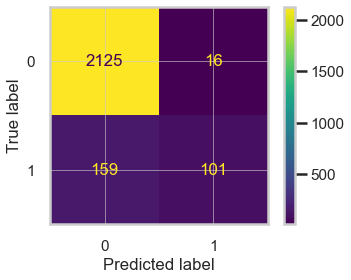

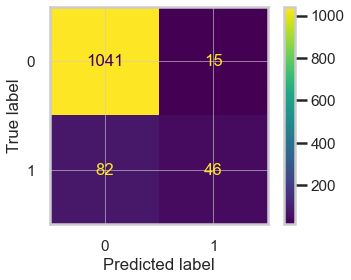

In [140]:
plot_confusion_matrix(lda_model,X_train,y_train);
plot_confusion_matrix(lda_model,X_test,y_test);

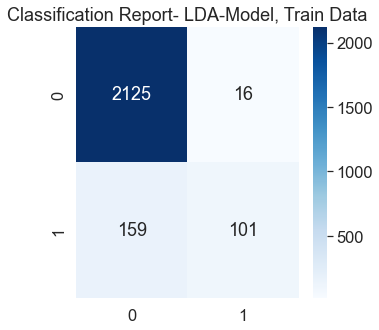

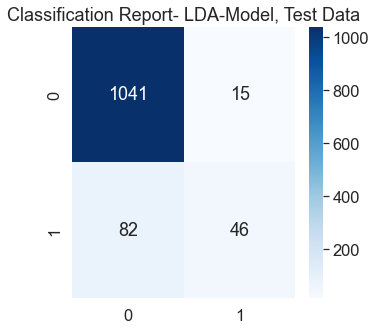

In [100]:
cm_train_lda = confusion_matrix(y_train,y_train_pred_lda)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_train_lda,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Classification Report- LDA-Model, Train Data')
cm_test_lda = confusion_matrix(y_test,y_test_pred_lda)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_test_lda,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Classification Report- LDA-Model, Test Data');

In [101]:
cr_train_lda = classification_report(y_train,y_train_pred_lda)
print('Classification Report- LDA-Model, Train Data')
print(cr_train_lda,'\n')
print('Classification Report- LDA-Model, Test Data')
cr_test_lda = classification_report(y_test,y_test_pred_lda)
print(cr_test_lda)


Classification Report- LDA-Model, Train Data
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2141
           1       0.86      0.39      0.54       260

    accuracy                           0.93      2401
   macro avg       0.90      0.69      0.75      2401
weighted avg       0.92      0.93      0.91      2401
 

Classification Report- LDA-Model, Test Data
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1056
           1       0.75      0.36      0.49       128

    accuracy                           0.92      1184
   macro avg       0.84      0.67      0.72      1184
weighted avg       0.91      0.92      0.90      1184



# Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [103]:
rfcl=RandomForestClassifier()

In [104]:
# X_train is the train data set without the dependent variable 'y'

rfcl.fit(X_train, y_train)


y_train_rf= rfcl.predict(X_train)
y_test_rf = rfcl.predict(X_test)



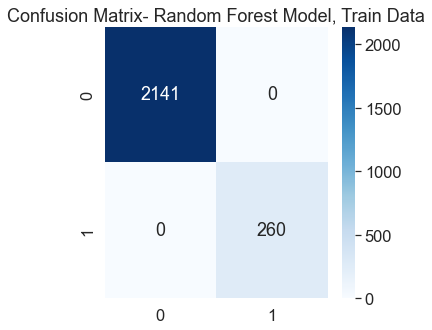

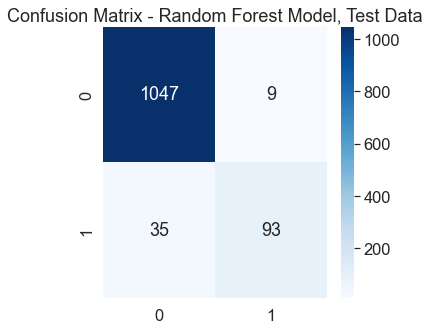

In [105]:
# Confusion Matrix


cm_train_rf= confusion_matrix(y_train,y_train_rf)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_train_rf,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix- Random Forest Model, Train Data');

cm_test_rf = confusion_matrix(y_test,y_test_rf)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_test_rf,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix - Random Forest Model, Test Data');


In [106]:
cr_train_rf= classification_report(y_train,y_train_rf)

print('Classification Report- Random Forest Model, Train Data')
print(cr_train_rf,'\n')

print('Classification Report- Random Forest Model, Train Data')
cr_test_rf = classification_report(y_test,y_test_rf)
print(cr_test_rf)


Classification Report- Random Forest Model, Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2141
           1       1.00      1.00      1.00       260

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401
 

Classification Report- Random Forest Model, Train Data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1056
           1       0.91      0.73      0.81       128

    accuracy                           0.96      1184
   macro avg       0.94      0.86      0.89      1184
weighted avg       0.96      0.96      0.96      1184



# Search for best Parameters

In [107]:
param_grid1 = {
    'max_depth' : [3,5,7],
    'min_samples_leaf' : [5,10,15],
    'min_samples_split' :[15,30,15],
    'n_estimators': [25,50]}



In [108]:
print(param_grid1)

{'max_depth': [3, 5, 7], 'min_samples_leaf': [5, 10, 15], 'min_samples_split': [15, 30, 15], 'n_estimators': [25, 50]}


In [109]:
grid_search1 = GridSearchCV(estimator = rfcl,
                          param_grid=param_grid1)

In [110]:
grid_search1.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 15],
                         'n_estimators': [25, 50]})

In [111]:
display(grid_search1.best_params_)

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 25}

In [112]:
best_grid1=grid_search1.best_estimator_

In [113]:
y_train_rf_gv1= best_grid1.predict(X_train)
y_test_rf_gv1= best_grid1.predict(X_test)
y_train_rf_gv1_prob= best_grid1.predict_proba(X_train)
y_test_rf_gv1_prob= best_grid1.predict_proba(X_test)

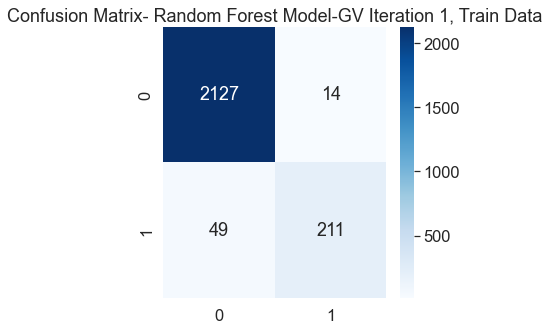

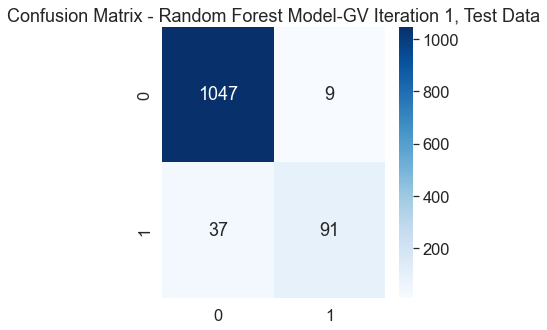

In [114]:
cm_train_rf_gv1 = confusion_matrix(y_train,y_train_rf_gv1)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_train_rf_gv1,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix- Random Forest Model-GV Iteration 1, Train Data');

cm_test_rf_gv1 = confusion_matrix(y_test,y_test_rf_gv1)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_test_rf_gv1,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix - Random Forest Model-GV Iteration 1, Test Data');


In [130]:
cr_train_rf_gv1= classification_report(y_train,y_train_rf_gv1)

print('Classification Report- Random Forest Model-GV Iteration 1, Train Data')
print(cr_train_rf_gv1,'\n')

print('Classification Report- Random Forest Model-GV Iteration 1 Train Data')
cr_test_rf_gv1= classification_report(y_test,y_test_rf_gv1)
print(cr_test_rf_gv1)


Classification Report- Random Forest Model-GV Iteration 1, Train Data
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2141
           1       0.94      0.81      0.87       260

    accuracy                           0.97      2401
   macro avg       0.96      0.90      0.93      2401
weighted avg       0.97      0.97      0.97      2401
 

Classification Report- Random Forest Model-GV Iteration 1 Train Data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1056
           1       0.91      0.71      0.80       128

    accuracy                           0.96      1184
   macro avg       0.94      0.85      0.89      1184
weighted avg       0.96      0.96      0.96      1184



{'max_depth': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 60,
 'n_estimators': 100}

Classification Report- Random Forest Model,GV Iterartion 2- Train Data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2141
           1       0.94      0.76      0.84       260

    accuracy                           0.97      2401
   macro avg       0.95      0.88      0.91      2401
weighted avg       0.97      0.97      0.97      2401
 

Classification Report- Random Forest Model , GV Iterartion 2 -Test Data
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1056
           1       0.93      0.69      0.79       128

    accuracy                           0.96      1184
   macro avg       0.94      0.84      0.88      1184
weighted avg       0.96      0.96      0.96      1184



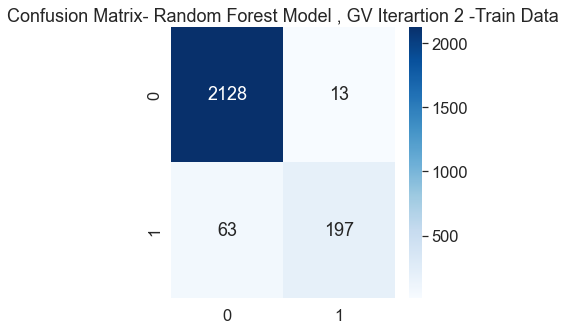

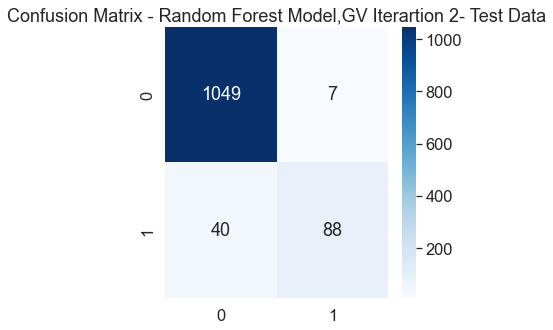

In [116]:
param_grid2 = {
    'max_depth' : [5,7,9],
    'min_samples_leaf' : [10,15,20],
    'min_samples_split' :[30,45,60],
    'n_estimators': [50,100]}

grid_search2 = GridSearchCV(estimator = rfcl,
                          param_grid=param_grid2)

grid_search2.fit(X_train,y_train)

display(grid_search2.best_params_)

best_grid2=grid_search2.best_estimator_

y_train_rf_gv2= best_grid2.predict(X_train)
y_test_rf_gv2= best_grid2.predict(X_test)

cm_train_rf_gv2 = confusion_matrix(y_train,y_train_rf_gv2)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_train_rf_gv2,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix- Random Forest Model , GV Iterartion 2 -Train Data')

cm_test_rf_gv2 = confusion_matrix(y_test,y_test_rf_gv2)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm_test_rf_gv2,
           cmap='Blues',
           annot=True,
           fmt='d');
plt.title('Confusion Matrix - Random Forest Model,GV Iterartion 2- Test Data')


cr_train_rf_gv2= classification_report(y_train,y_train_rf_gv2)

print('Classification Report- Random Forest Model,GV Iterartion 2- Train Data')
print(cr_train_rf_gv2,'\n')

print('Classification Report- Random Forest Model , GV Iterartion 2 -Test Data')
cr_test_rf_gv2 = classification_report(y_test,y_test_rf_gv2)
print(cr_test_rf_gv2)



In [117]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from termcolor import colored

Confusion Matrix for the Test Data


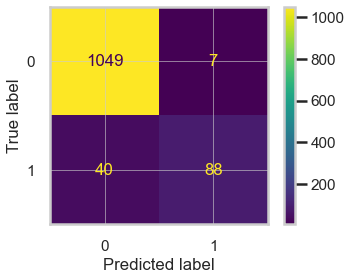

In [123]:
import warnings
warnings.filterwarnings('ignore')
print(colored('Confusion Matrix for the Test Data','blue',attrs=['bold']))
plot_confusion_matrix(best_grid2,X_test,y_test);

# ROC curve for the Random Forest - GV1 model



AUC Train Data Random Forest GV1 model: 0.996


AUC Test Data Random Forest GV1 model: 0.975


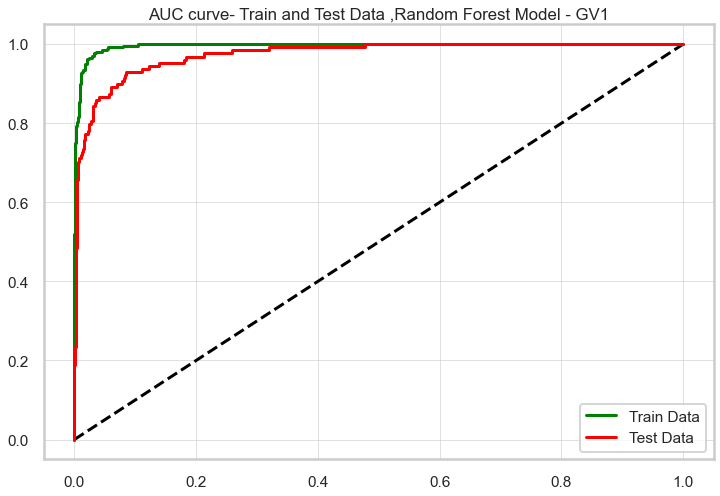

In [131]:
y_train_rf_gv1= best_grid1.predict(X_train)
y_test_rf_gv1= best_grid1.predict(X_test)
y_train_rf_gv1_prob= best_grid1.predict_proba(X_train)
y_test_rf_gv1_prob= best_grid1.predict_proba(X_test)
y_train_rf_gv1_prob=y_train_rf_gv1_prob[:,1]         # only the probabilities for 1 for train data
y_test_rf_gv1_prob=y_test_rf_gv1_prob[:,1]           # only the probabilities for 1 for test data



plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.set_context("poster", font_scale = .7, rc={"grid.linewidth": 0.6})



auc_train_score = roc_auc_score(y_train,y_train_rf_gv1_prob)
print('\n')
print(colored('AUC Train Data Random Forest GV1 model: %.3f' % auc_train_score,'green',attrs=['bold']))

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_rf_gv1_prob)
plt.plot([0, 1], [0, 1], linestyle='--',color='black')
plt.plot(train_fpr, train_tpr,label='Train Data',color='green');



auc_test_score = roc_auc_score(y_test,y_test_rf_gv1_prob)
print('\n')
print(colored('AUC Test Data Random Forest GV1 model: %.3f' % auc_test_score,'red',attrs=['bold']))


test_fpr,test_tpr,test_threshold = roc_curve(y_test,y_test_rf_gv1_prob)
plt.plot(test_fpr, test_tpr,label='Test Data',color='red');

plt.title('AUC curve- Train and Test Data ,Random Forest Model - GV1');
plt.legend(loc='best');


# ROC curve for the Random Forest - GV2 model



AUC Train Data Random Forest GV2 model: 0.991


AUC Test Data Random Forest GV2 model: 0.981


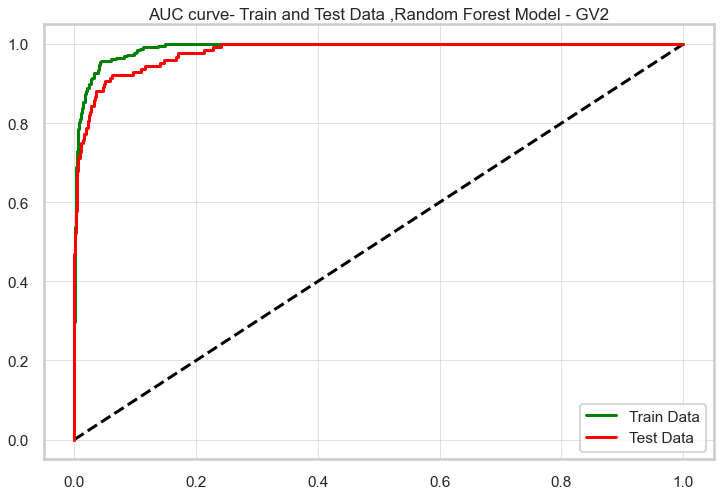

In [127]:
y_train_rf_gv2= best_grid2.predict(X_train)
y_test_rf_gv2= best_grid2.predict(X_test)
y_train_rf_gv2_prob= best_grid2.predict_proba(X_train)
y_test_rf_gv2_prob= best_grid2.predict_proba(X_test)
y_train_rf_gv2_prob=y_train_rf_gv2_prob[:,1]         # only the probabilities for 2 for train data
y_test_rf_gv2_prob=y_test_rf_gv2_prob[:,1]           # only the probabilities for 2 for test data



plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.set_context("poster", font_scale = .7, rc={"grid.linewidth": 0.6})



auc_train_score = roc_auc_score(y_train,y_train_rf_gv2_prob)
print('\n')
print(colored('AUC Train Data Random Forest GV2 model: %.3f' % auc_train_score,'green',attrs=['bold']))

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_rf_gv2_prob)
plt.plot([0, 1], [0, 1], linestyle='--',color='black')
plt.plot(train_fpr, train_tpr,label='Train Data',color='green');



auc_test_score = roc_auc_score(y_test,y_test_rf_gv2_prob)
print('\n')
print(colored('AUC Test Data Random Forest GV2 model: %.3f' % auc_test_score,'red',attrs=['bold']))


test_fpr,test_tpr,test_threshold = roc_curve(y_test,y_test_rf_gv2_prob)
#plt.plot([0, 1], [0, 1], linestyle='--',color='black')
plt.plot(test_fpr, test_tpr,label='Test Data',color='red');

plt.title('AUC curve- Train and Test Data ,Random Forest Model - GV2');
plt.legend(loc='best');
